In [409]:
#!pip3 install openpyxl plotly yfinance matplotlib pandas_ta ta pmdarima optuna requests

In [410]:
#$!pip install tensorflow

In [411]:
import numpy as np
import pandas as pd
import requests
import pandas_ta as ta
import ta as ta2
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp
import ast
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, MaxPooling1D, Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Первый датасет

In [412]:
## данные с 1 января 2019 по 9 сенятбря 2024 
news_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTXRo2VOPKprX-FrgiR-iXAIy7tdNUMdyuZc5CE0qffRV8XWMmPhA3O1diMDAvZ7wm2JI9k-G510Ip/pub?output=csv')
news_data = news_data[['newsDatetime', 'negative', 'positive', 'important', 'liked', 'disliked', 'comments', 'currencies']]
news_data.head(50)

newsDatetime  negative  positive  important  liked  disliked  comments  \
0    6/9/2022 6:57         0         0          0      0         0         0   
1    6/9/2022 6:03         0         0          0      1         0         0   
2    6/9/2022 5:39         1         0          1      0         0         0   
3    6/9/2022 5:32         0         0          0      0         0         0   
4    6/9/2022 5:28         0         1          0      2         0         0   
5    6/9/2022 5:20         0         1          0      1         1         0   
6    6/9/2022 5:01         0         2          0      1         0         0   
7    6/9/2022 4:45         0         0          0      0         0         0   
8    6/9/2022 4:00         1         0          1      3         0         3   
9    6/9/2022 3:40         0         0          1      0         0         0   
10   6/9/2022 3:31         0         6          3      4         0         0   
11   6/9/2022 3:13         0         0          0      0         0         0   
12   6/9/2022 3:08         1         0          0      0         0         0   
13   6/9/2022 3:01         1         0          0      0         1         0   
14   6/9/2022 3:00         0         1          0      0         0         0   
15   6/9/2022 2:41         0         0          0      0         0         0   
16   6/9/2022 2:40         0         0          0      0         0         0   
17   6/9/2022 2:40         0         0          0      0         0         0   
18   6/9/2022 2:30         0         0          0      0         0         0   
19   6/9/2022 2:00         0         0          0      0         0         0   
20   6/9/2022 2:00         0         0          0      0         0         0   
21   6/9/2022 2:00         0         1          0      0         2         1   
22   6/9/2022 1:35         1         1          0      0         0         0   
23   6/9/2022 1:22         6         0          2      3         2         0   
24   6/9/2022 1:15         0         1          1      1         0         1   
25   6/9/2022 1:00         0         1          1      1         0         0   
26   6/9/2022 1:00         0         1          1      1         0         0   
27   6/9/2022 1:00         0         0          0      0         0         0   
28   6/9/2022 1:00         0         1          1      0         0         0   
29   6/9/2022 0:00         0         0          0      0         0         0   
30  6/8/2022 23:12         0         0          0      0         1         0   
31  6/8/2022 23:07         0         0          0      0         0         0   
32  6/8/2022 23:00         2         1          0      1         3         0   
33  6/8/2022 23:00         0         1          1      1         0         0   
34  6/8/2022 23:00         0         0          0      1         0         1   
35  6/8/2022 22:53         0         0          0      0         0         0   
36  6/8/2022 22:50         0         0          0      0         0         0   
37  6/8/2022 22:30         0         0          0      0         0         0   
38  6/8/2022 22:20         0         5          2      2         0         0   
39  6/8/2022 22:08         0         0          0      0         0         0   
40  6/8/2022 22:02         0         0          0      0         0         0   
41  6/8/2022 22:01         0         0          0      0         1         3   
42  6/8/2022 22:00         0         1          1      1         0         0   
43  6/8/2022 21:58         0         1          1      1         0         0   
44  6/8/2022 21:39         0         0          0      0         0         0   
45  6/8/2022 21:38         0         0          0      0         0         0   
46  6/8/2022 21:35         0         0          0      1         1         1   
47  6/8/2022 21:30         0         0          0      0         0         0   
48  6/8/2022 21:13         0         0          0      0         0         0   
49  6/

In [413]:
## преобразуем дату
#news_data['newsDatetime'] = news_data['newsDatetime']. \
##    apply(lambda x: x.split()[0].split('/')[2] + '-' +  x.split()[0].split('/')[0] + '-' + x.split()[0].split('/')[1])
#news_data
news_data['newsDatetime'] = pd.to_datetime(news_data['newsDatetime'], format='mixed').dt.date
news_data

newsDatetime  negative  positive  important  liked  disliked  comments  \
0        2022-06-09         0         0          0      0         0         0   
1        2022-06-09         0         0          0      1         0         0   
2        2022-06-09         1         0          1      0         0         0   
3        2022-06-09         0         0          0      0         0         0   
4        2022-06-09         0         1          0      2         0         0   
...             ...       ...       ...        ...    ...       ...       ...   
164996   2024-07-15         0         0          0      0         0         0   
164997   2024-07-15         0         0          0      0         0         0   
164998   2024-07-15         0         0          0      0         0         0   
164999   2024-07-13         0         0          0      0         0         0   
165000   2024-07-12         0         0          0      0         0         0   

             currencies  
0               ETH,APE  
1                   NaN  
2                  LUNC  
3                   XCN  
4                   NaN  
...                 ...  
164996          ETH,MOG  
164997              MOG  
164998          ETH,MOG  
164999      BTC,ETH,MOG  
165000  BTC,ETH,SOL,MOG  

[165001 rows x 8 columns]

In [414]:
news_data['newsDatetime'].max()

datetime.date(2024, 9, 24)

In [415]:
news_data['newsDatetime'].min()

datetime.date(2017, 9, 23)

In [416]:
news_data['liked'].value_counts()

liked
0      138785
1        5696
2        3099
3        3033
4        2636
        ...  
85          1
99          1
110         1
88          1
106         1
Name: count, Length: 86, dtype: int64

In [417]:
## ищем пропуски
news_data.isna().sum() 

newsDatetime      0
negative          0
positive          0
important         0
liked             0
disliked          0
comments          0
currencies      958
dtype: int64

In [418]:
## на данных видно что есть пропуски в currencies, так что удалим пропущенные значения
news_data.dropna(inplace=True)

# Получение датасетов по отдельным криптовалютам

In [419]:
def create_new_dataset(crypto_name):
    ## берем данные где содержится название криптовалюты
    some_news_data = news_data[news_data['currencies'].str.contains(crypto_name)]
    some_news_data.reset_index(inplace=True)
    ## убираем уже не нужные столбцы 
    some_news_data = some_news_data.drop(['currencies', 'index'], axis=1)
    ## считаем суммы для параметров
    some_news_data = some_news_data.groupby(by='newsDatetime', as_index=False). \
        agg({'negative': 'sum', 'positive': 'sum', 'important': 'sum',	'liked': 'sum',	'disliked': 'sum', 'comments': 'sum'})
    return some_news_data

In [420]:
bitcoin_news_data = create_new_dataset('BTC')
bitcoin_news_data

newsDatetime  negative  positive  important  liked  disliked  comments
0      2017-09-29         4         5          0      0         0         0
1      2017-10-31         5         5          5      0         0         0
2      2017-11-12         1         1          2      0         1         0
3      2017-11-13         2         2          1      0         0         0
4      2017-11-14         0         8          5      0         0         0
...           ...       ...       ...        ...    ...       ...       ...
1532   2024-09-20         1        13          6     10         1         1
1533   2024-09-21        13        17          5     16        11         6
1534   2024-09-22         4        17          9     15         4         6
1535   2024-09-23         5        14         14     14         4         6
1536   2024-09-24         0         0          0      0         0         0

[1537 rows x 7 columns]

In [421]:
eth_news_data = create_new_dataset('ETH')
eth_news_data

newsDatetime  negative  positive  important  liked  disliked  comments
0      2017-09-23         0         3          1      0         0         0
1      2017-12-13         0         7          5      0         0         0
2      2017-12-15         9         3          4      0         0         0
3      2017-12-16         3         3          0      0         0         0
4      2017-12-19         3         0          1      0         0         0
...           ...       ...       ...        ...    ...       ...       ...
1424   2024-09-20         3        18          7     19         3        12
1425   2024-09-21         4        14          3     15         5         4
1426   2024-09-22         4        11          6     11         2         6
1427   2024-09-23         2         3          2      3         2         3
1428   2024-09-24         0         0          0      0         0         0

[1429 rows x 7 columns]

In [422]:
sol_news_data = create_new_dataset('SOL')
sol_news_data

newsDatetime  negative  positive  important  liked  disliked  comments
0      2021-02-10         0         0          0      0         0         0
1      2021-02-18         0         7          4      6         0         2
2      2021-02-23         1         3          2      1         0         1
3      2021-02-24         0         4          0      1         0         1
4      2021-03-11         2        11          6      9         2         3
...           ...       ...       ...        ...    ...       ...       ...
1024   2024-09-20         5        34          0     36         5         7
1025   2024-09-21        10        23          1     25         8         5
1026   2024-09-22         4        17          4     17         5         4
1027   2024-09-23         3        11          0      9         3         0
1028   2024-09-24         0         0          0      0         0         0

[1029 rows x 7 columns]

In [423]:
card_news_data = create_new_dataset('ADA')
card_news_data

newsDatetime  negative  positive  important  liked  disliked  comments
0      2018-01-11         5         4          0      0         0         0
1      2018-03-17         3         0          0      1         5         0
2      2018-03-19         1         2          0      1         2         0
3      2018-07-13         1        27         18     19         2         0
4      2018-12-13         3         0          0      0         2         1
...           ...       ...       ...        ...    ...       ...       ...
1157   2024-09-19        20        26         17     26        21        13
1158   2024-09-20        15        16         11     17        16        10
1159   2024-09-21        15        12          5     12        15         3
1160   2024-09-22         1         0          0      0         0         0
1161   2024-09-23         3         3          1      2         3         1

[1162 rows x 7 columns]

In [424]:
ripp_news_data = create_new_dataset('XRP')
ripp_news_data

newsDatetime  negative  positive  important  liked  disliked  comments
0      2017-12-13         0         7          5      0         0         0
1      2018-01-04        15         4         11      0         0         0
2      2018-01-05         9         4          1      0         0         0
3      2018-01-31         0         4          0      4         0         0
4      2018-02-03         3         9          4      8         2         0
...           ...       ...       ...        ...    ...       ...       ...
1201   2024-09-20         2         8          2      6         1         0
1202   2024-09-21         0         2          1      2         0         1
1203   2024-09-22         0         3          2      4         0         2
1204   2024-09-23         1         0          1      0         1         3
1205   2024-09-24         0         0          0      0         0         0

[1206 rows x 7 columns]

In [425]:
doge_news_data = create_new_dataset('DOGE')
doge_news_data

newsDatetime  negative  positive  important  liked  disliked  comments
0      2018-02-18         0         4          4      6         0         0
1      2018-02-22         0         3          0      3         0         0
2      2018-04-18         0         7          2      4         4         0
3      2018-09-05         0         2          3      3         0         0
4      2018-09-13        10         5          4      5         5         5
...           ...       ...       ...        ...    ...       ...       ...
1009   2024-09-19         0         0          0      0         0         1
1010   2024-09-20         0         0          0      0         0         0
1011   2024-09-21         0         1          0      1         0         0
1012   2024-09-22         0         0          0      1         0         0
1013   2024-09-23         0         1          1      2         0         0

[1014 rows x 7 columns]

# Получение цены криптовалют с помощью API

In [426]:
## функция для получения данных с Binance
def get_crypto_price(symbol, interval, days):
    api_key = 'ace6a59ff46446659af4e691fab88e22'
    api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&exchange=Binance&interval={interval}&outputsize={days}&apikey={api_key}'
    raw = requests.get(api_url).json()
    df = pd.DataFrame(raw['values'])
    df = df.iloc[::-1].reset_index(drop=True)
    return df

In [427]:
## функция для перевода значений в числовой формат
def prices_to_numeric(some_prices):
    some_prices['open'] = pd.to_numeric(some_prices['open'])
    some_prices['high'] = pd.to_numeric(some_prices['high'])
    some_prices['low'] = pd.to_numeric(some_prices['low'])
    some_prices['close'] = pd.to_numeric(some_prices['close'])
    return some_prices

In [428]:
bitcoin_prices = get_crypto_price('BTC/USD', '1day', 1431)
bitcoin_prices = bitcoin_prices[:1348]
bitcoin_prices['datetime'] = pd.to_datetime(bitcoin_prices['datetime'], format='mixed').dt.date
bitcoin_prices = prices_to_numeric(bitcoin_prices)
bitcoin_prices

datetime         open          high          low        close
0     2021-02-18  52186.66016  52293.968750  51392.23047  51578.51953
1     2021-02-19  51640.55859  56197.261720  50915.96094  55886.39844
2     2021-02-20  56030.69922  57424.839840  55583.10156  55915.55859
3     2021-02-21  55904.64062  58004.070312  55610.69141  57420.16016
4     2021-02-22  57461.83984  57461.839840  52751.14062  54094.57812
...          ...          ...           ...          ...          ...
1343  2024-10-23  67426.01000  67472.830000  65260.00000  66668.65000
1344  2024-10-24  66668.65000  68850.000000  66510.00000  68198.28000
1345  2024-10-25  68198.27000  68771.490000  65596.29000  66698.33000
1346  2024-10-26  66698.32000  67454.550000  66439.90000  67092.76000
1347  2024-10-27  67092.76000  68332.050000  66913.73000  68021.70000

[1348 rows x 5 columns]

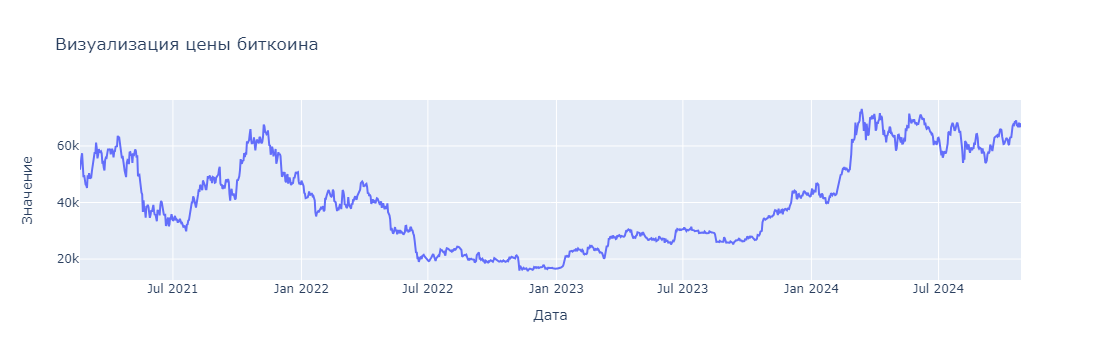

In [429]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=bitcoin_prices['datetime'], y=bitcoin_prices['close'], mode='lines', name='VALUE'))
fig.update_layout(title='Визуализация цены биткоина', xaxis_title='Дата', yaxis_title='Значение')
fig.show()

In [430]:
eth_prices = get_crypto_price('ETH/USD', '1day', 1428)
eth_prices = eth_prices[:1348]
eth_prices['datetime'] = pd.to_datetime(eth_prices['datetime'], format='mixed').dt.date
eth_prices = prices_to_numeric(eth_prices)
eth_prices

datetime        open        high          low        close
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000
...          ...         ...         ...          ...          ...
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000

[1348 rows x 5 columns]

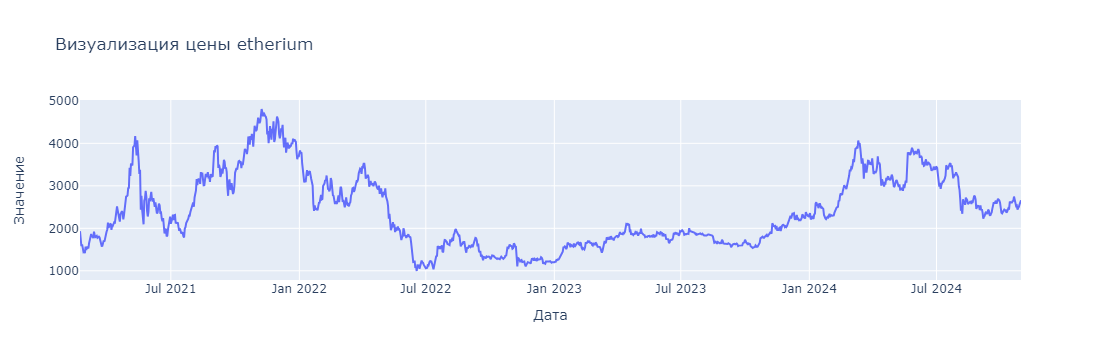

In [431]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=eth_prices['datetime'], y=eth_prices['close'], mode='lines', name='VALUE'))
fig.update_layout(title='Визуализация цены etherium', xaxis_title='Дата', yaxis_title='Значение')
fig.show()

In [432]:
sol_prices = get_crypto_price('SOL/USD', '1day', 1431)
sol_prices = sol_prices[:1348]
sol_prices['datetime'] = pd.to_datetime(sol_prices['datetime'], format='mixed').dt.date
sol_prices = prices_to_numeric(eth_prices)
sol_prices

datetime        open        high          low        close
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000
...          ...         ...         ...          ...          ...
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000

[1348 rows x 5 columns]

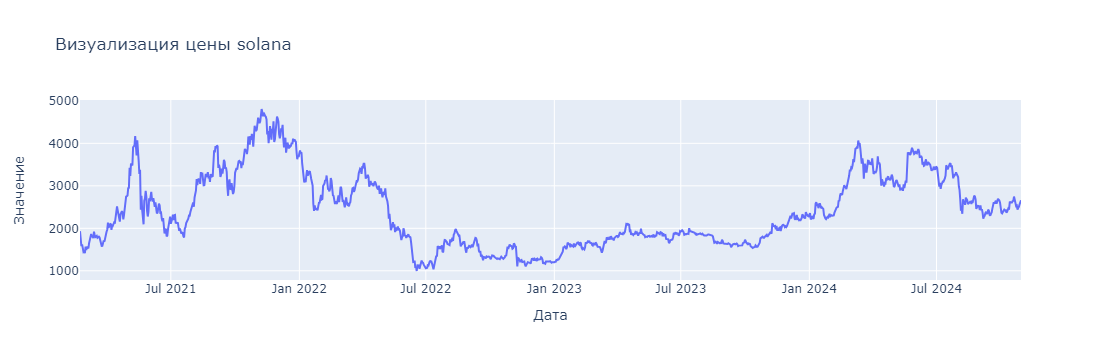

In [433]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sol_prices['datetime'], y=sol_prices['close'], mode='lines', name='VALUE'))
fig.update_layout(title='Визуализация цены solana', xaxis_title='Дата', yaxis_title='Значение')
fig.show()

In [434]:
doge_prices = get_crypto_price('DOGE/USD', '1day', 1431)
doge_prices = doge_prices[:1348]
doge_prices['datetime'] = pd.to_datetime(doge_prices['datetime'], format='mixed').dt.date
doge_prices = prices_to_numeric(eth_prices)
doge_prices

datetime        open        high          low        close
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000
...          ...         ...         ...          ...          ...
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000

[1348 rows x 5 columns]

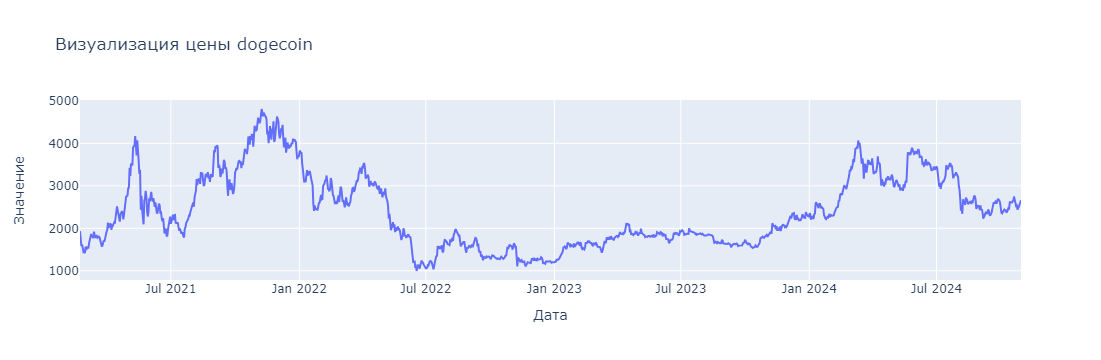

In [435]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=doge_prices['datetime'], y=doge_prices['close'], mode='lines', name='VALUE'))
fig.update_layout(title='Визуализация цены dogecoin', xaxis_title='Дата', yaxis_title='Значение')
fig.show()

In [436]:
ripp_prices = get_crypto_price('XRP/USD', '1day', 1431)
ripp_prices = doge_prices[:1348]
ripp_prices['datetime'] = pd.to_datetime(ripp_prices['datetime'], format='mixed').dt.date
ripp_prices = prices_to_numeric(ripp_prices)
ripp_prices

datetime        open        high          low        close
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000
...          ...         ...         ...          ...          ...
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000

[1348 rows x 5 columns]

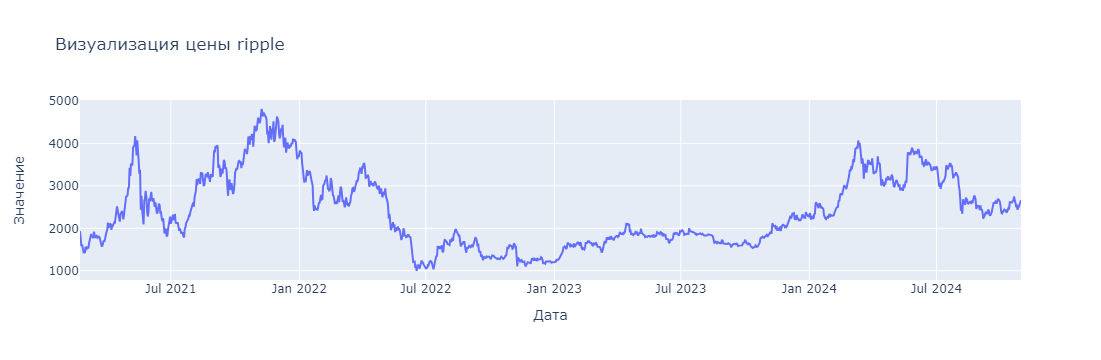

In [437]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ripp_prices['datetime'], y=ripp_prices['close'], mode='lines', name='VALUE'))
fig.update_layout(title='Визуализация цены ripple', xaxis_title='Дата', yaxis_title='Значение')
fig.show()

In [438]:
card_prices = get_crypto_price('ADA/USD', '1day', 1431)
card_prices = card_prices[:1348]
card_prices['datetime'] = pd.to_datetime(card_prices['datetime'], format='mixed').dt.date
card_prices = prices_to_numeric(card_prices)
card_prices

datetime     open     high      low    close
0     2021-02-18  0.89348  0.94203  0.89348  0.91391
1     2021-02-19  0.91725  0.94315  0.88551  0.92577
2     2021-02-20  0.93065  1.15652  0.92569  1.11481
3     2021-02-21  1.11215  1.12958  1.08755  1.09975
4     2021-02-22  1.10127  1.12764  0.97611  1.09706
...          ...      ...      ...      ...      ...
1343  2024-10-23  0.36450  0.36920  0.34230  0.34970
1344  2024-10-24  0.34970  0.35510  0.33960  0.34650
1345  2024-10-25  0.34650  0.34720  0.31410  0.32610
1346  2024-10-26  0.32600  0.33500  0.32060  0.33370
1347  2024-10-27  0.33380  0.34240  0.33090  0.33990

[1348 rows x 5 columns]

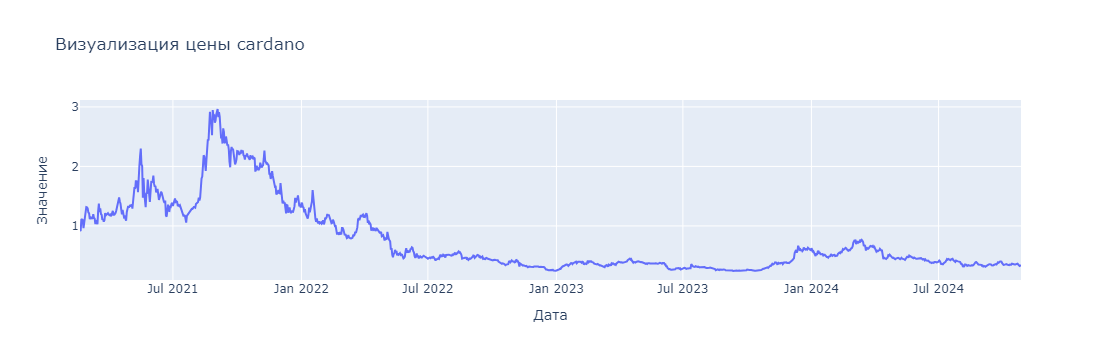

In [439]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=card_prices['datetime'], y=card_prices['close'], mode='lines', name='VALUE'))
fig.update_layout(title='Визуализация цены cardano', xaxis_title='Дата', yaxis_title='Значение')
fig.show()

# Добавление новых признаков

In [440]:
def adding_new_features(some_prices):
    # Индекс относительной силы (RSI)
    some_prices['rsi'] = ta.rsi(some_prices['close'], length=14)
    
    # MACD (Moving Average Convergence Divergence)
    macd = ta.macd(some_prices['close'])
    some_prices['macd'] = macd['MACD_12_26_9']
    
    # Короткая и длинная скользящие средние
    some_prices['moving_average_short'] = ta.sma(some_prices['close'], length=20)
    some_prices['moving_average_long'] = ta.sma(some_prices['close'], length=50)
    
    # Полосы Боллинджера
    bollinger = ta.bbands(some_prices['close'], length=20, std=2)
    some_prices['bollinger_upper'] = bollinger['BBU_20_2.0']
    some_prices['bollinger_lower'] = bollinger['BBL_20_2.0']
    
    # Стохастический осциллятор
    stoch = ta.stoch(some_prices['high'], some_prices['low'], some_prices['close'])
    some_prices['stoch_k'] = stoch['STOCHk_14_3_3']
    some_prices['stoch_d'] = stoch['STOCHd_14_3_3']
    
    # Средний истинный диапазон (ATR)
    some_prices['atr'] = ta.atr(some_prices['high'], some_prices['low'], some_prices['close'], length=14)
    
    # Индекс среднего направленного движения (ADX)
    some_prices['adx'] = ta.adx(some_prices['high'], some_prices['low'], some_prices['close'], length=14)['ADX_14']
    
    # Индикатор Вильямса %R
    some_prices['williams_r'] = ta.willr(some_prices['high'], some_prices['low'], some_prices['close'], length=14)
    
    # Индекс товарного канала (CCI)
    some_prices['cci'] = ta.cci(some_prices['high'], some_prices['low'], some_prices['close'], length=20)
    
    # Заполнение пропущенных значений
    some_prices.fillna(0, inplace=True)

    return some_prices

In [441]:
adding_new_features(bitcoin_prices)

datetime         open          high          low        close  \
0     2021-02-18  52186.66016  52293.968750  51392.23047  51578.51953   
1     2021-02-19  51640.55859  56197.261720  50915.96094  55886.39844   
2     2021-02-20  56030.69922  57424.839840  55583.10156  55915.55859   
3     2021-02-21  55904.64062  58004.070312  55610.69141  57420.16016   
4     2021-02-22  57461.83984  57461.839840  52751.14062  54094.57812   
...          ...          ...           ...          ...          ...   
1343  2024-10-23  67426.01000  67472.830000  65260.00000  66668.65000   
1344  2024-10-24  66668.65000  68850.000000  66510.00000  68198.28000   
1345  2024-10-25  68198.27000  68771.490000  65596.29000  66698.33000   
1346  2024-10-26  66698.32000  67454.550000  66439.90000  67092.76000   
1347  2024-10-27  67092.76000  68332.050000  66913.73000  68021.70000   

            rsi         macd  moving_average_short  moving_average_long  \
0      0.000000     0.000000              0.000000             0.000000   
1      0.000000     0.000000              0.000000             0.000000   
2      0.000000     0.000000              0.000000             0.000000   
3      0.000000     0.000000              0.000000             0.000000   
4      0.000000     0.000000              0.000000             0.000000   
...         ...          ...                   ...                  ...   
1343  57.880437  1572.343558          64822.001992         62307.998844   
1344  62.966548  1585.541090          65127.916578         62512.546631   
1345  55.845189  1458.158061          65359.491086         62722.912997   
1346  57.215495  1373.203858          65573.128500         62985.468197   
1347  60.337421  1365.098726          65863.013500         63262.839775   

      bollinger_upper  bollinger_lower    stoch_k    stoch_d          atr  \
0            0.000000         0.000000   0.000000   0.000000     0.000000   
1            0.000000         0.000000   0.000000   0.000000     0.000000   
2            0.000000         0.000000   0.000000   0.000000     0.000000   
3            0.000000         0.000000   0.000000   0.000000     0.000000   
4            0.000000         0.000000   0.000000   0.000000     0.000000   
...               ...              ...        ...        ...          ...   
1343     70543.165068     59100.838916  77.659884  84.381796  1922.656416   
1344     70884.086729     59371.746427  79.743253  80.959015  1952.466672   
1345     70975.378309     59743.603863  73.753349  77.052162  2039.804767   
1346     71110.878824     60035.378176  71.911189  75.135931  1966.579427   
1347     71274.696560     60451.330440  69.510454  71.724997  1927.418039   

            adx  williams_r        cci  
0      0.000000    0.000000   0.000000  
1      0.000000    0.000000   0.000000  
2      0.000000    0.000000   0.000000  
3      0.000000    0.000000   0.000000  
4      0.000000    0.000000   0.000000  
...         ...         ...        ...  
1343  20.762518  -26.962355  44.062796  
1344  20.686936  -14.008236  71.907127  
1345  20.017232  -37.769361  45.712125  
1346  19.395364  -32.488835  40.705211  
1347  19.276811  -21.210443  56.894234  

[1348 rows x 17 columns]

In [442]:
## сделаем одну таблицу со всеми признаками 
bitcoin_data = bitcoin_news_data.merge(bitcoin_prices, how='inner', left_on='newsDatetime', right_on='datetime')
## уберем повторяющийся столбец
bitcoin_data.drop(['datetime'], inplace=True, axis=1)
bitcoin_data

newsDatetime  negative  positive  important  liked  disliked  comments  \
0      2021-02-18         0         3          3      4         0         1   
1      2021-02-19        28       124         79    111        28        58   
2      2021-02-20         0        20         12     18         0         2   
3      2021-02-21        32        53         29     41        34        55   
4      2021-02-22        24         9         10     10         9         8   
...           ...       ...       ...        ...    ...       ...       ...   
1267   2024-09-20         1        13          6     10         1         1   
1268   2024-09-21        13        17          5     16        11         6   
1269   2024-09-22         4        17          9     15         4         6   
1270   2024-09-23         5        14         14     14         4         6   
1271   2024-09-24         0         0          0      0         0         0   

             open          high          low  ...  moving_average_short  \
0     52186.66016  52293.968750  51392.23047  ...              0.000000   
1     51640.55859  56197.261720  50915.96094  ...              0.000000   
2     56030.69922  57424.839840  55583.10156  ...              0.000000   
3     55904.64062  58004.070312  55610.69141  ...              0.000000   
4     57461.83984  57461.839840  52751.14062  ...              0.000000   
...           ...           ...          ...  ...                   ...   
1267  62971.71875  64079.988280  62373.98828  ...          58360.498632   
1268  63196.00000  63525.988280  62790.10156  ...          58662.043554   
1269  63389.53906  63993.968750  62378.21875  ...          58883.657617   
1270  63582.23828  64705.859380  62706.50000  ...          59176.052148   
1271  63349.98828  64665.960940  62750.96094  ...          59490.307617   

      moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0                0.000000         0.000000         0.000000   0.000000   
1                0.000000         0.000000         0.000000   0.000000   
2                0.000000         0.000000         0.000000   0.000000   
3                0.000000         0.000000         0.000000   0.000000   
4                0.000000         0.000000         0.000000   0.000000   
...                   ...              ...              ...        ...   
1267         59182.895156     63407.105103     53313.892161  94.440206   
1268         59219.833593     64126.399775     53197.687332  92.099596   
1269         59277.016796     64750.957008     53016.358226  93.041683   
1270         59380.634140     65311.337481     53040.766816  90.816655   
1271         59586.394140     65980.098930     53000.516305  91.513525   

        stoch_d          atr        adx  williams_r         cci  
0      0.000000     0.000000   0.000000    0.000000    0.000000  
1      0.000000     0.000000   0.000000    0.000000    0.000000  
2      0.000000     0.000000   0.000000    0.000000    0.000000  
3      0.000000     0.000000   0.000000    0.000000    0.000000  
4      0.000000     0.000000   0.000000    0.000000    0.000000  
...         ...          ...        ...         ...         ...  
1267  91.357731  2258.364446  16.951551   -8.418951  180.873208  
1268  93.345100  2149.616037  17.164687   -7.021829  150.657180  
1269  93.193828  2111.482749  17.565340   -5.434172  129.785837  
1270  91.985978  2103.473937  18.240151  -15.094035  118.877324  
1271  91.790621  2090.011513  18.866760   -4.931220  112.742562  

[1272 rows x 23 columns]

In [443]:
## надо построить график

In [444]:
adding_new_features(eth_prices)

datetime        open        high          low        close        rsi  \
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030   0.000000   
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976   0.000000   
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010   0.000000   
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010   0.000000   
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000   0.000000   
...          ...         ...         ...          ...          ...        ...   
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000  45.578840   
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000  47.598664   
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000  52.115224   
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000  56.896514   
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000  58.182097   

           macd  moving_average_short  moving_average_long  bollinger_upper  \
0      0.000000              0.000000             0.000000         0.000000   
1      0.000000              0.000000             0.000000         0.000000   
2      0.000000              0.000000             0.000000         0.000000   
3      0.000000              0.000000             0.000000         0.000000   
4      0.000000              0.000000             0.000000         0.000000   
...         ...                   ...                  ...              ...   
1343   8.663957           2538.487995          2495.404002      2747.460696   
1344   4.673204           2542.745500          2500.088400      2745.481146   
1345   6.254087           2549.075000          2505.515002      2746.531178   
1346  13.110743           2562.491500          2511.098405      2745.519089   
1347  19.959910           2576.126500          2516.526404      2744.739251   

      bollinger_lower    stoch_k    stoch_d         atr        adx  \
0            0.000000   0.000000   0.000000    0.000000   0.000000   
1            0.000000   0.000000   0.000000    0.000000   0.000000   
2            0.000000   0.000000   0.000000    0.000000   0.000000   
3            0.000000   0.000000   0.000000    0.000000   0.000000   
4            0.000000   0.000000   0.000000    0.000000   0.000000   
...               ...        ...        ...         ...        ...   
1343      2329.515294  26.848290  36.661669  101.879516  20.116219   
1344      2340.009854  24.396254  28.072235   99.163837  19.753249   
1345      2351.618822  35.326148  28.856897  100.509277  18.631142   
1346      2379.463911  48.791646  36.171349  101.948614  18.002087   
1347      2407.513749  61.834975  48.650923  103.426570  17.799519   

      williams_r        cci  
0       0.000000   0.000000  
1       0.000000   0.000000  
2       0.000000   0.000000  
3       0.000000   0.000000  
4       0.000000   0.000000  
...          ...        ...  
1343  -74.173538 -48.542643  
1344  -67.636796 -31.507851  
1345  -52.211223  -2.940264  
1346  -33.777043  58.458137  
1347  -28.506811  79.799890  

[1348 rows x 17 columns]

In [445]:
## сделаем одну таблицу со всеми признаками 
eth_data = eth_news_data.merge(eth_prices, how='inner', left_on='newsDatetime', right_on='datetime')
## уберем повторяющийся столбец
eth_data.drop(['datetime'], inplace=True, axis=1)
eth_data

newsDatetime  negative  positive  important  liked  disliked  comments  \
0      2021-02-21         6         7          2      8         2         0   
1      2021-02-22        34        23         27     27        11        10   
2      2021-02-23        64        26         25     18        12        45   
3      2021-02-24         1         9          3      4         0         8   
4      2021-02-25        11        42         26     33         2         6   
...           ...       ...       ...        ...    ...       ...       ...   
1252   2024-09-20         3        18          7     19         3        12   
1253   2024-09-21         4        14          3     15         5         4   
1254   2024-09-22         4        11          6     11         2         6   
1255   2024-09-23         2         3          2      3         2         3   
1256   2024-09-24         0         0          0      0         0         0   

            open        high          low  ...  moving_average_short  \
0     1915.73999  1956.64001  1915.739990  ...              0.000000   
1     1934.81995  1934.81995  1777.099976  ...              0.000000   
2     1777.18994  1777.18994  1509.280030  ...              0.000000   
3     1577.40002  1697.73999  1565.859990  ...              0.000000   
4     1622.89001  1622.89001  1479.250000  ...              0.000000   
...          ...         ...          ...  ...                   ...   
1252  2466.36011  2570.47998  2438.989990  ...           2383.120971   
1253  2562.47998  2619.73999  2530.090088  ...           2392.408471   
1254  2613.27002  2631.28003  2527.750000  ...           2394.550475   
1255  2579.79004  2701.54004  2544.889890  ...           2405.774975   
1256  2648.15991  2669.16992  2592.989990  ...           2415.857983   

      moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0                0.000000         0.000000         0.000000   0.000000   
1                0.000000         0.000000         0.000000   0.000000   
2                0.000000         0.000000         0.000000   0.000000   
3                0.000000         0.000000         0.000000   0.000000   
4                0.000000         0.000000         0.000000   0.000000   
...                   ...              ...              ...        ...   
1252          2527.313388      2548.146032      2218.095910  86.541845   
1253          2519.769985      2584.966974      2199.849968  95.894680   
1254          2513.296987      2594.362661      2194.738290  94.097697   
1255          2512.479389      2633.951757      2177.598193  90.946861   
1256          2517.210791      2667.683276      2164.032690  87.864586   

        stoch_d         atr        adx  williams_r         cci  
0      0.000000    0.000000   0.000000    0.000000    0.000000  
1      0.000000    0.000000   0.000000    0.000000    0.000000  
2      0.000000    0.000000   0.000000    0.000000    0.000000  
3      0.000000    0.000000   0.000000    0.000000    0.000000  
4      0.000000    0.000000   0.000000    0.000000    0.000000  
...         ...         ...        ...         ...         ...  
1252  71.209784  115.604073  32.545073   -2.611620  154.932056  
1253  85.106484  113.750204  30.856685   -1.750449  192.319574  
1254  92.178074  113.020192  29.394107  -13.344839  171.949649  
1255  93.646413  116.136617  28.649620  -12.064129  187.113564  
1256  90.969715  113.282568  27.958311  -10.997273  158.836419  

[1257 rows x 23 columns]

In [446]:
adding_new_features(sol_prices)

datetime        open        high          low        close        rsi  \
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030   0.000000   
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976   0.000000   
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010   0.000000   
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010   0.000000   
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000   0.000000   
...          ...         ...         ...          ...          ...        ...   
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000  45.578840   
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000  47.598664   
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000  52.115224   
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000  56.896514   
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000  58.182097   

           macd  moving_average_short  moving_average_long  bollinger_upper  \
0      0.000000              0.000000             0.000000         0.000000   
1      0.000000              0.000000             0.000000         0.000000   
2      0.000000              0.000000             0.000000         0.000000   
3      0.000000              0.000000             0.000000         0.000000   
4      0.000000              0.000000             0.000000         0.000000   
...         ...                   ...                  ...              ...   
1343   8.663957           2538.487995          2495.404002      2747.460696   
1344   4.673204           2542.745500          2500.088400      2745.481146   
1345   6.254087           2549.075000          2505.515002      2746.531178   
1346  13.110743           2562.491500          2511.098405      2745.519089   
1347  19.959910           2576.126500          2516.526404      2744.739251   

      bollinger_lower    stoch_k    stoch_d         atr        adx  \
0            0.000000   0.000000   0.000000    0.000000   0.000000   
1            0.000000   0.000000   0.000000    0.000000   0.000000   
2            0.000000   0.000000   0.000000    0.000000   0.000000   
3            0.000000   0.000000   0.000000    0.000000   0.000000   
4            0.000000   0.000000   0.000000    0.000000   0.000000   
...               ...        ...        ...         ...        ...   
1343      2329.515294  26.848290  36.661669  101.879516  20.116219   
1344      2340.009854  24.396254  28.072235   99.163837  19.753249   
1345      2351.618822  35.326148  28.856897  100.509277  18.631142   
1346      2379.463911  48.791646  36.171349  101.948614  18.002087   
1347      2407.513749  61.834975  48.650923  103.426570  17.799519   

      williams_r        cci  
0       0.000000   0.000000  
1       0.000000   0.000000  
2       0.000000   0.000000  
3       0.000000   0.000000  
4       0.000000   0.000000  
...          ...        ...  
1343  -74.173538 -48.542643  
1344  -67.636796 -31.507851  
1345  -52.211223  -2.940264  
1346  -33.777043  58.458137  
1347  -28.506811  79.799890  

[1348 rows x 17 columns]

In [447]:
## сделаем одну таблицу со всеми признаками 
sol_data = sol_news_data.merge(sol_prices, how='inner', left_on='newsDatetime', right_on='datetime')
## уберем повторяющийся столбец
sol_data.drop(['datetime'], inplace=True, axis=1)
sol_data

newsDatetime  negative  positive  important  liked  disliked  comments  \
0      2021-02-23         1         3          2      1         0         1   
1      2021-02-24         0         4          0      1         0         1   
2      2021-03-11         2        11          6      9         2         3   
3      2021-03-28         0         6          1      8         0         1   
4      2021-04-03         0         1          0      2         0         0   
...           ...       ...       ...        ...    ...       ...       ...   
1022   2024-09-20         5        34          0     36         5         7   
1023   2024-09-21        10        23          1     25         8         5   
1024   2024-09-22         4        17          4     17         5         4   
1025   2024-09-23         3        11          0      9         3         0   
1026   2024-09-24         0         0          0      0         0         0   

            open        high          low  ...  moving_average_short  \
0     1777.18994  1777.18994  1509.280030  ...              0.000000   
1     1577.40002  1697.73999  1565.859990  ...              0.000000   
2     1794.88000  1823.60999  1788.969970  ...              0.000000   
3     1711.84998  1712.81006  1687.270020  ...           1762.196997   
4     2133.62012  2133.62012  2007.979980  ...           1795.225989   
...          ...         ...          ...  ...                   ...   
1022  2466.36011  2570.47998  2438.989990  ...           2383.120971   
1023  2562.47998  2619.73999  2530.090088  ...           2392.408471   
1024  2613.27002  2631.28003  2527.750000  ...           2394.550475   
1025  2579.79004  2701.54004  2544.889890  ...           2405.774975   
1026  2648.15991  2669.16992  2592.989990  ...           2415.857983   

      moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0                0.000000         0.000000         0.000000   0.000000   
1                0.000000         0.000000         0.000000   0.000000   
2                0.000000         0.000000         0.000000  92.141966   
3                0.000000      1934.899692      1589.494302  41.589435   
4                0.000000      2060.614382      1529.837596  92.695072   
...                   ...              ...              ...        ...   
1022          2527.313388      2548.146032      2218.095910  86.541845   
1023          2519.769985      2584.966974      2199.849968  95.894680   
1024          2513.296987      2594.362661      2194.738290  94.097697   
1025          2512.479389      2633.951757      2177.598193  90.946861   
1026          2517.210791      2667.683276      2164.032690  87.864586   

        stoch_d         atr        adx  williams_r         cci  
0      0.000000    0.000000   0.000000    0.000000    0.000000  
1      0.000000    0.000000   0.000000    0.000000    0.000000  
2     91.750495   96.085981   0.000000   -8.967230    0.000000  
3     29.681703   70.530908  14.165685  -55.786853  -65.926692  
4     97.565024   84.125322  18.986653  -21.914784  192.127743  
...         ...         ...        ...         ...         ...  
1022  71.209784  115.604073  32.545073   -2.611620  154.932056  
1023  85.106484  113.750204  30.856685   -1.750449  192.319574  
1024  92.178074  113.020192  29.394107  -13.344839  171.949649  
1025  93.646413  116.136617  28.649620  -12.064129  187.113564  
1026  90.969715  113.282568  27.958311  -10.997273  158.836419  

[1027 rows x 23 columns]

In [448]:
adding_new_features(doge_prices)

datetime        open        high          low        close        rsi  \
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030   0.000000   
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976   0.000000   
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010   0.000000   
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010   0.000000   
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000   0.000000   
...          ...         ...         ...          ...          ...        ...   
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000  45.578840   
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000  47.598664   
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000  52.115224   
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000  56.896514   
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000  58.182097   

           macd  moving_average_short  moving_average_long  bollinger_upper  \
0      0.000000              0.000000             0.000000         0.000000   
1      0.000000              0.000000             0.000000         0.000000   
2      0.000000              0.000000             0.000000         0.000000   
3      0.000000              0.000000             0.000000         0.000000   
4      0.000000              0.000000             0.000000         0.000000   
...         ...                   ...                  ...              ...   
1343   8.663957           2538.487995          2495.404002      2747.460696   
1344   4.673204           2542.745500          2500.088400      2745.481146   
1345   6.254087           2549.075000          2505.515002      2746.531178   
1346  13.110743           2562.491500          2511.098405      2745.519089   
1347  19.959910           2576.126500          2516.526404      2744.739251   

      bollinger_lower    stoch_k    stoch_d         atr        adx  \
0            0.000000   0.000000   0.000000    0.000000   0.000000   
1            0.000000   0.000000   0.000000    0.000000   0.000000   
2            0.000000   0.000000   0.000000    0.000000   0.000000   
3            0.000000   0.000000   0.000000    0.000000   0.000000   
4            0.000000   0.000000   0.000000    0.000000   0.000000   
...               ...        ...        ...         ...        ...   
1343      2329.515294  26.848290  36.661669  101.879516  20.116219   
1344      2340.009854  24.396254  28.072235   99.163837  19.753249   
1345      2351.618822  35.326148  28.856897  100.509277  18.631142   
1346      2379.463911  48.791646  36.171349  101.948614  18.002087   
1347      2407.513749  61.834975  48.650923  103.426570  17.799519   

      williams_r        cci  
0       0.000000   0.000000  
1       0.000000   0.000000  
2       0.000000   0.000000  
3       0.000000   0.000000  
4       0.000000   0.000000  
...          ...        ...  
1343  -74.173538 -48.542643  
1344  -67.636796 -31.507851  
1345  -52.211223  -2.940264  
1346  -33.777043  58.458137  
1347  -28.506811  79.799890  

[1348 rows x 17 columns]

In [449]:
## сделаем одну таблицу со всеми признаками 
doge_data = doge_news_data.merge(doge_prices, how='inner', left_on='newsDatetime', right_on='datetime')
## уберем повторяющийся столбец
doge_data.drop(['datetime'], inplace=True, axis=1)
doge_data

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-21         5         1          2      3         1         7   
1     2021-02-25        14        10         15     22         4        47   
2     2021-03-01         7         0          2      1         0         2   
3     2021-03-03         0         4          3      3         0        34   
4     2021-03-04         0        13          5      9         2         6   
..           ...       ...       ...        ...    ...       ...       ...   
982   2024-09-19         0         0          0      0         0         1   
983   2024-09-20         0         0          0      0         0         0   
984   2024-09-21         0         1          0      1         0         0   
985   2024-09-22         0         0          0      1         0         0   
986   2024-09-23         0         1          1      2         0         0   

           open        high          low  ...  moving_average_short  \
0    1915.73999  1956.64001  1915.739990  ...              0.000000   
1    1622.89001  1622.89001  1479.250000  ...              0.000000   
2    1418.28003  1569.79004  1418.280030  ...              0.000000   
3    1485.66003  1609.56995  1485.660030  ...              0.000000   
4    1567.76001  1572.82996  1538.579960  ...              0.000000   
..          ...         ...          ...  ...                   ...   
982  2375.00000  2491.51001  2373.310060  ...           2380.730981   
983  2466.36011  2570.47998  2438.989990  ...           2383.120971   
984  2562.47998  2619.73999  2530.090088  ...           2392.408471   
985  2613.27002  2631.28003  2527.750000  ...           2394.550475   
986  2579.79004  2701.54004  2544.889890  ...           2405.774975   

     moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0               0.000000         0.000000         0.000000   0.000000   
1               0.000000         0.000000         0.000000   0.000000   
2               0.000000         0.000000         0.000000   0.000000   
3               0.000000         0.000000         0.000000   0.000000   
4               0.000000         0.000000         0.000000   0.000000   
..                   ...              ...              ...        ...   
982          2540.184790      2536.483053      2224.978909  72.882927   
983          2527.313388      2548.146032      2218.095910  86.541845   
984          2519.769985      2584.966974      2199.849968  95.894680   
985          2513.296987      2594.362661      2194.738290  94.097697   
986          2512.479389      2633.951757      2177.598193  90.946861   

       stoch_d         atr        adx  williams_r         cci  
0     0.000000    0.000000   0.000000    0.000000    0.000000  
1     0.000000    0.000000   0.000000    0.000000    0.000000  
2     0.000000    0.000000   0.000000    0.000000    0.000000  
3     0.000000    0.000000   0.000000    0.000000    0.000000  
4     0.000000    0.000000   0.000000    0.000000    0.000000  
..         ...         ...        ...         ...         ...  
982  57.129550  114.382080  34.851632   -7.953890   70.306027  
983  71.209784  115.604073  32.545073   -2.611620  154.932056  
984  85.106484  113.750204  30.856685   -1.750449  192.319574  
985  92.178074  113.020192  29.394107  -13.344839  171.949649  
986  93.646413  116.136617  28.649620  -12.064129  187.113564  

[987 rows x 23 columns]

In [450]:
adding_new_features(ripp_prices)

datetime        open        high          low        close        rsi  \
0     2021-02-21  1915.73999  1956.64001  1915.739990  1933.780030   0.000000   
1     2021-02-22  1934.81995  1934.81995  1777.099976  1777.099976   0.000000   
2     2021-02-23  1777.18994  1777.18994  1509.280030  1577.890010   0.000000   
3     2021-02-24  1577.40002  1697.73999  1565.859990  1623.510010   0.000000   
4     2021-02-25  1622.89001  1622.89001  1479.250000  1479.250000   0.000000   
...          ...         ...         ...          ...          ...        ...   
1343  2024-10-26  2440.63000  2508.00000  2430.120000  2482.510000  45.578840   
1344  2024-10-27  2482.51000  2527.99000  2464.130000  2507.800000  47.598664   
1345  2024-10-28  2507.80000  2589.67000  2471.670000  2567.480000  52.115224   
1346  2024-10-29  2567.49000  2681.86000  2561.200000  2638.800000  56.896514   
1347  2024-10-30  2638.80000  2722.30000  2599.660000  2659.190000  58.182097   

           macd  moving_average_short  moving_average_long  bollinger_upper  \
0      0.000000              0.000000             0.000000         0.000000   
1      0.000000              0.000000             0.000000         0.000000   
2      0.000000              0.000000             0.000000         0.000000   
3      0.000000              0.000000             0.000000         0.000000   
4      0.000000              0.000000             0.000000         0.000000   
...         ...                   ...                  ...              ...   
1343   8.663957           2538.487995          2495.404002      2747.460696   
1344   4.673204           2542.745500          2500.088400      2745.481146   
1345   6.254087           2549.075000          2505.515002      2746.531178   
1346  13.110743           2562.491500          2511.098405      2745.519089   
1347  19.959910           2576.126500          2516.526404      2744.739251   

      bollinger_lower    stoch_k    stoch_d         atr        adx  \
0            0.000000   0.000000   0.000000    0.000000   0.000000   
1            0.000000   0.000000   0.000000    0.000000   0.000000   
2            0.000000   0.000000   0.000000    0.000000   0.000000   
3            0.000000   0.000000   0.000000    0.000000   0.000000   
4            0.000000   0.000000   0.000000    0.000000   0.000000   
...               ...        ...        ...         ...        ...   
1343      2329.515294  26.848290  36.661669  101.879516  20.116219   
1344      2340.009854  24.396254  28.072235   99.163837  19.753249   
1345      2351.618822  35.326148  28.856897  100.509277  18.631142   
1346      2379.463911  48.791646  36.171349  101.948614  18.002087   
1347      2407.513749  61.834975  48.650923  103.426570  17.799519   

      williams_r        cci  
0       0.000000   0.000000  
1       0.000000   0.000000  
2       0.000000   0.000000  
3       0.000000   0.000000  
4       0.000000   0.000000  
...          ...        ...  
1343  -74.173538 -48.542643  
1344  -67.636796 -31.507851  
1345  -52.211223  -2.940264  
1346  -33.777043  58.458137  
1347  -28.506811  79.799890  

[1348 rows x 17 columns]

In [451]:
## сделаем одну таблицу со всеми признаками 
ripp_data = ripp_news_data.merge(ripp_prices, how='inner', left_on='newsDatetime', right_on='datetime')
## уберем повторяющийся столбец
ripp_data.drop(['datetime'], inplace=True, axis=1)
ripp_data

newsDatetime  negative  positive  important  liked  disliked  comments  \
0      2021-02-21        16        50         29     41         9        13   
1      2021-02-22        66        38         32     42        13        15   
2      2021-02-23        19        10          5      7         6         3   
3      2021-02-24         9        13          5      8         4        19   
4      2021-02-25        11         7          6      5         1         2   
...           ...       ...       ...        ...    ...       ...       ...   
1078   2024-09-20         2         8          2      6         1         0   
1079   2024-09-21         0         2          1      2         0         1   
1080   2024-09-22         0         3          2      4         0         2   
1081   2024-09-23         1         0          1      0         1         3   
1082   2024-09-24         0         0          0      0         0         0   

            open        high          low  ...  moving_average_short  \
0     1915.73999  1956.64001  1915.739990  ...              0.000000   
1     1934.81995  1934.81995  1777.099976  ...              0.000000   
2     1777.18994  1777.18994  1509.280030  ...              0.000000   
3     1577.40002  1697.73999  1565.859990  ...              0.000000   
4     1622.89001  1622.89001  1479.250000  ...              0.000000   
...          ...         ...          ...  ...                   ...   
1078  2466.36011  2570.47998  2438.989990  ...           2383.120971   
1079  2562.47998  2619.73999  2530.090088  ...           2392.408471   
1080  2613.27002  2631.28003  2527.750000  ...           2394.550475   
1081  2579.79004  2701.54004  2544.889890  ...           2405.774975   
1082  2648.15991  2669.16992  2592.989990  ...           2415.857983   

      moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0                0.000000         0.000000         0.000000   0.000000   
1                0.000000         0.000000         0.000000   0.000000   
2                0.000000         0.000000         0.000000   0.000000   
3                0.000000         0.000000         0.000000   0.000000   
4                0.000000         0.000000         0.000000   0.000000   
...                   ...              ...              ...        ...   
1078          2527.313388      2548.146032      2218.095910  86.541845   
1079          2519.769985      2584.966974      2199.849968  95.894680   
1080          2513.296987      2594.362661      2194.738290  94.097697   
1081          2512.479389      2633.951757      2177.598193  90.946861   
1082          2517.210791      2667.683276      2164.032690  87.864586   

        stoch_d         atr        adx  williams_r         cci  
0      0.000000    0.000000   0.000000    0.000000    0.000000  
1      0.000000    0.000000   0.000000    0.000000    0.000000  
2      0.000000    0.000000   0.000000    0.000000    0.000000  
3      0.000000    0.000000   0.000000    0.000000    0.000000  
4      0.000000    0.000000   0.000000    0.000000    0.000000  
...         ...         ...        ...         ...         ...  
1078  71.209784  115.604073  32.545073   -2.611620  154.932056  
1079  85.106484  113.750204  30.856685   -1.750449  192.319574  
1080  92.178074  113.020192  29.394107  -13.344839  171.949649  
1081  93.646413  116.136617  28.649620  -12.064129  187.113564  
1082  90.969715  113.282568  27.958311  -10.997273  158.836419  

[1083 rows x 23 columns]

In [452]:
adding_new_features(card_prices)

datetime     open     high      low    close        rsi      macd  \
0     2021-02-18  0.89348  0.94203  0.89348  0.91391   0.000000  0.000000   
1     2021-02-19  0.91725  0.94315  0.88551  0.92577   0.000000  0.000000   
2     2021-02-20  0.93065  1.15652  0.92569  1.11481   0.000000  0.000000   
3     2021-02-21  1.11215  1.12958  1.08755  1.09975   0.000000  0.000000   
4     2021-02-22  1.10127  1.12764  0.97611  1.09706   0.000000  0.000000   
...          ...      ...      ...      ...      ...        ...       ...   
1343  2024-10-23  0.36450  0.36920  0.34230  0.34970  46.996777 -0.000109   
1344  2024-10-24  0.34970  0.35510  0.33960  0.34650  45.515256 -0.000817   
1345  2024-10-25  0.34650  0.34720  0.31410  0.32610  37.417279 -0.002990   
1346  2024-10-26  0.32600  0.33500  0.32060  0.33370  41.586912 -0.004052   
1347  2024-10-27  0.33380  0.34240  0.33090  0.33990  44.816980 -0.004343   

      moving_average_short  moving_average_long  bollinger_upper  \
0                 0.000000             0.000000         0.000000   
1                 0.000000             0.000000         0.000000   
2                 0.000000             0.000000         0.000000   
3                 0.000000             0.000000         0.000000   
4                 0.000000             0.000000         0.000000   
...                    ...                  ...              ...   
1343              0.352445             0.353878         0.367203   
1344              0.352190             0.354346         0.367172   
1345              0.350945             0.354366         0.369763   
1346              0.349760             0.354744         0.369751   
1347              0.349220             0.355036         0.369659   

      bollinger_lower    stoch_k    stoch_d       atr        adx  williams_r  \
0            0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
1            0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
2            0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
3            0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
4            0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
...               ...        ...        ...       ...        ...         ...   
1343         0.337687  64.895330  70.567999  0.016548  10.529022  -56.038647   
1344         0.337208  49.196935  64.149430  0.016473  10.179935  -76.080692   
1345         0.332127  29.429608  47.840625  0.017661  11.437758  -79.591837   
1346         0.329769  25.886935  34.837826  0.017428  12.605736  -66.666667   
1347         0.328781  32.539683  29.285409  0.017004  13.022012  -56.122449   

             cci  
0       0.000000  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
1343   18.180422  
1344  -65.348670  
1345 -228.102052  
1346 -180.788433  
1347  -97.085144  

[1348 rows x 17 columns]

In [453]:
## сделаем одну таблицу со всеми признаками 
card_data = card_news_data.merge(card_prices, how='inner', left_on='newsDatetime', right_on='datetime')
## уберем повторяющийся столбец
card_data.drop(['datetime'], inplace=True, axis=1)
card_data

newsDatetime  negative  positive  important  liked  disliked  comments  \
0      2021-02-18         1         0          0      1         1         0   
1      2021-02-19         2        28          8     16         1        21   
2      2021-02-20         1         1          2     10         0         2   
3      2021-02-22         6         7          1      5         2         1   
4      2021-02-24         1         6          2      3         0         0   
...           ...       ...       ...        ...    ...       ...       ...   
1113   2024-09-19        20        26         17     26        21        13   
1114   2024-09-20        15        16         11     17        16        10   
1115   2024-09-21        15        12          5     12        15         3   
1116   2024-09-22         1         0          0      0         0         0   
1117   2024-09-23         3         3          1      2         3         1   

         open     high      low  ...  moving_average_short  \
0     0.89348  0.94203  0.89348  ...              0.000000   
1     0.91725  0.94315  0.88551  ...              0.000000   
2     0.93065  1.15652  0.92569  ...              0.000000   
3     1.10127  1.12764  0.97611  ...              0.000000   
4     0.96500  1.05291  0.96500  ...              0.000000   
...       ...      ...      ...  ...                   ...   
1113  0.34420  0.35630  0.34420  ...              0.338260   
1114  0.35140  0.36120  0.34910  ...              0.338620   
1115  0.35220  0.35980  0.35050  ...              0.339980   
1116  0.35840  0.35920  0.34320  ...              0.340755   
1117  0.35140  0.36550  0.34590  ...              0.343035   

      moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0                0.000000         0.000000         0.000000   0.000000   
1                0.000000         0.000000         0.000000   0.000000   
2                0.000000         0.000000         0.000000   0.000000   
3                0.000000         0.000000         0.000000   0.000000   
4                0.000000         0.000000         0.000000   0.000000   
...                   ...              ...              ...        ...   
1113             0.345570         0.363655         0.312865  64.161204   
1114             0.344758         0.364585         0.312655  72.608034   
1115             0.344650         0.367053         0.312907  78.815860   
1116             0.344394         0.368235         0.313275  74.930985   
1117             0.344792         0.370250         0.315820  81.946712   

        stoch_d       atr        adx  williams_r         cci  
0      0.000000  0.000000   0.000000    0.000000    0.000000  
1      0.000000  0.000000   0.000000    0.000000    0.000000  
2      0.000000  0.000000   0.000000    0.000000    0.000000  
3      0.000000  0.000000   0.000000    0.000000    0.000000  
4      0.000000  0.000000   0.000000    0.000000    0.000000  
...         ...       ...        ...         ...         ...  
1113  55.700777  0.016496  19.203731  -22.549020   82.255106  
1114  63.200485  0.016182  17.998668  -25.149721  100.132691  
1115  71.861699  0.015691  16.879682  -15.853679   99.605485  
1116  75.451626  0.015713  16.048015  -34.203646   64.167503  
1117  78.564519  0.015991  15.011209   -4.102538   97.791950  

[1118 rows x 23 columns]

# Визуализация признаков временных рядов

In [454]:
def visualize_with_plotly(technical_data):
    fig = go.Figure()

    # negative
    fig.add_trace(go.Scatter(x=technical_data['newsDatetime'], y=technical_data['negative'], mode='lines', name='NEGATIVE'))

    # positive
    fig.add_trace(go.Scatter(x=technical_data['newsDatetime'], y=technical_data['positive'], mode='lines', name='POSITIVE'))

    # important
    fig.add_trace(go.Scatter(x=technical_data['newsDatetime'], y=technical_data['important'], mode='lines', name='IMPORTANT'))


    # liked
    fig.add_trace(go.Scatter(x=technical_data['newsDatetime'], y=technical_data['liked'], mode='lines', name='LIKED'))

    # disliked
    fig.add_trace(go.Scatter(x=technical_data['newsDatetime'], y=technical_data['disliked'], mode='lines', name='DISLIKED'))

    # comments
    fig.add_trace(go.Scatter(x=technical_data['newsDatetime'], y=technical_data['comments'], mode='lines', name='COMMENTS'))

    fig.update_layout(title='Визуализация данных из соцсетей', xaxis_title='Дата', yaxis_title='Значение')
    fig.show()

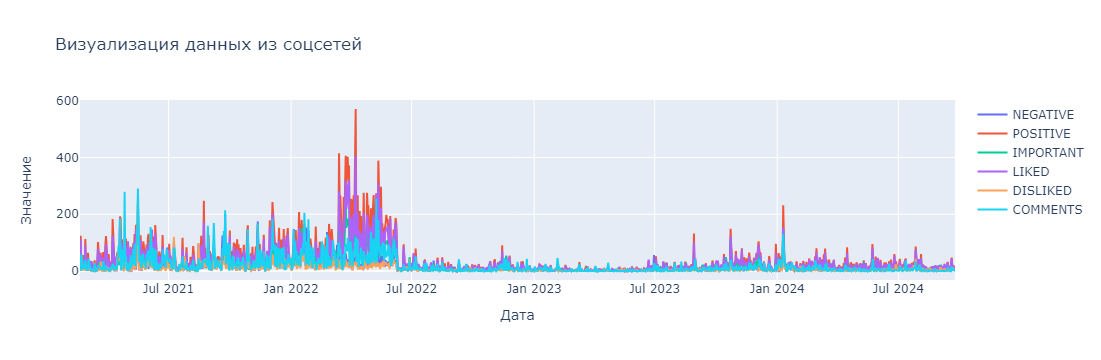

In [455]:
## для bitcoin
visualize_with_plotly(bitcoin_data)

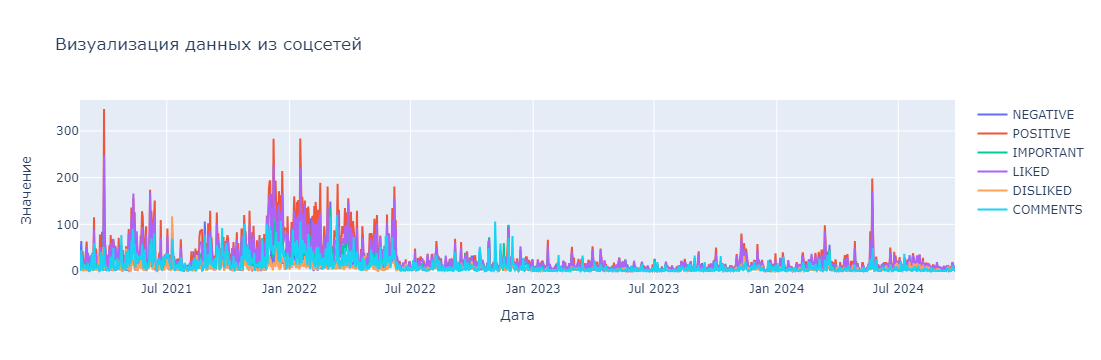

In [456]:
## для etherium
visualize_with_plotly(eth_data)

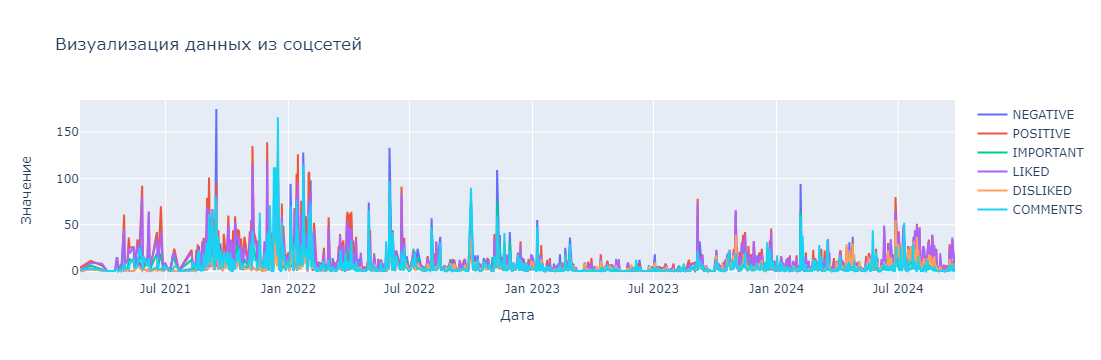

In [457]:
## для solana
visualize_with_plotly(sol_data)

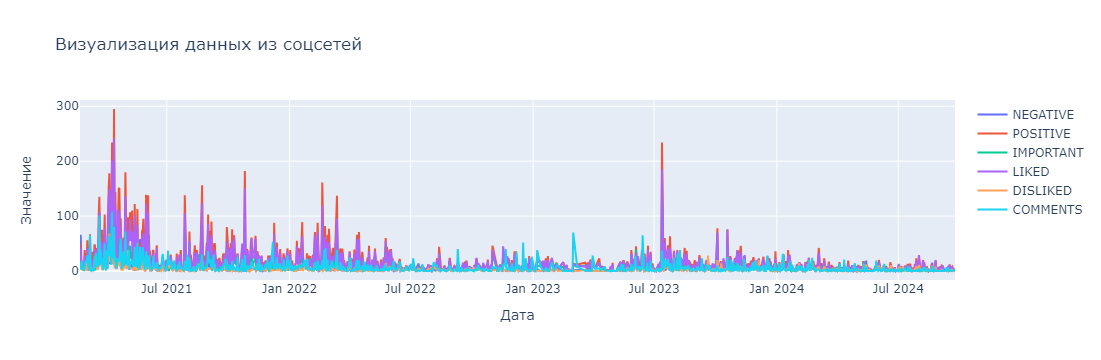

In [458]:
## для ripple
visualize_with_plotly(ripp_data)

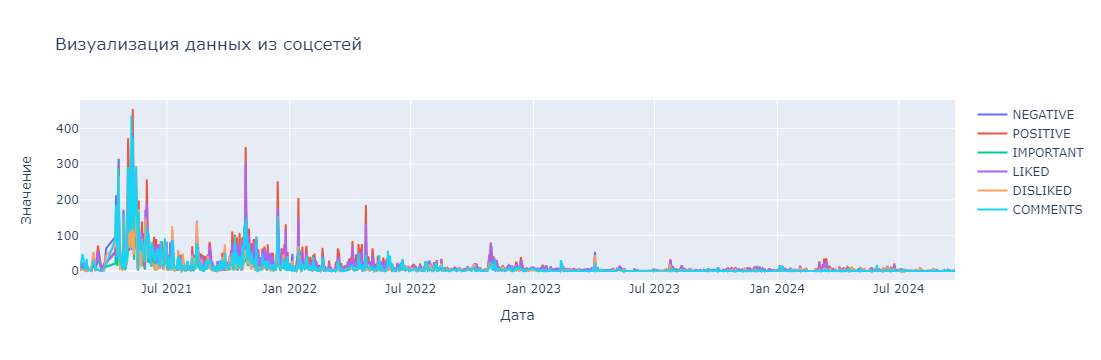

In [459]:
## для dogecoin
visualize_with_plotly(doge_data)

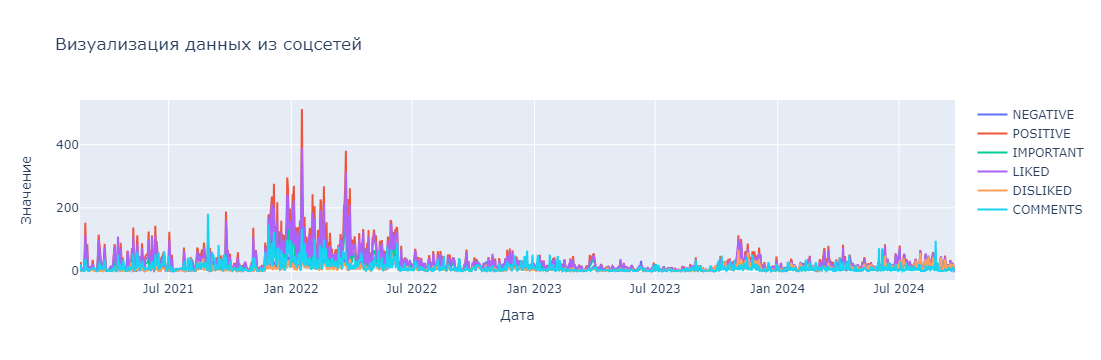

In [460]:
## для cardano
visualize_with_plotly(card_data)

# Удаление выбросов(для числовых данных)

In [461]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def data_clean(some_data):
    some_data_clean = some_data.copy()
    columns_to_normalize = ['close', 'negative', 'positive']
    if columns_to_normalize:
        for col in columns_to_normalize:
            some_data_clean  = remove_outliers(some_data_clean, col)
    some_data_clean.reset_index(inplace=True, drop=True)
    return some_data_clean
    

In [462]:
def remove_zero_sum(some_data):
    sum_values = some_data['negative'] + some_data['positive']	+ some_data['important'] \
        + some_data['liked'] + some_data['disliked'] + some_data['comments']
    some_data = some_data[sum_values != 0]
    some_data.reset_index(drop=True, inplace=True)
    return some_data

In [463]:
bitcoin_data_clean = data_clean(bitcoin_data)
bitcoin_data_clean = remove_zero_sum(bitcoin_data_clean)
bitcoin_data_clean['diff'] = bitcoin_data_clean['positive'] - bitcoin_data_clean['negative']
bitcoin_data_clean

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-18         0         3          3      4         0         1   
1     2021-02-20         0        20         12     18         0         2   
2     2021-02-21        32        53         29     41        34        55   
3     2021-02-22        24         9         10     10         9         8   
4     2021-02-24         9        17          8     10         4        19   
..           ...       ...       ...        ...    ...       ...       ...   
965   2024-09-19        12        47         33     45        14        15   
966   2024-09-20         1        13          6     10         1         1   
967   2024-09-21        13        17          5     16        11         6   
968   2024-09-22         4        17          9     15         4         6   
969   2024-09-23         5        14         14     14         4         6   

            open          high           low  ...  moving_average_long  \
0    52186.66016  52293.968750  51392.230470  ...             0.000000   
1    56030.69922  57424.839840  55583.101560  ...             0.000000   
2    55904.64062  58004.070312  55610.691410  ...             0.000000   
3    57461.83984  57461.839840  52751.140620  ...             0.000000   
4    48915.60156  51172.578120  48759.261720  ...             0.000000   
..           ...           ...           ...  ...                  ...   
965  61720.12891  63847.960940  61620.011719  ...         59225.954531   
966  62971.71875  64079.988280  62373.988280  ...         59182.895156   
967  63196.00000  63525.988280  62790.101560  ...         59219.833593   
968  63389.53906  63993.968750  62378.218750  ...         59277.016796   
969  63582.23828  64705.859380  62706.500000  ...         59380.634140   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d          atr  \
0           0.000000         0.000000   0.000000   0.000000     0.000000   
1           0.000000         0.000000   0.000000   0.000000     0.000000   
2           0.000000         0.000000   0.000000   0.000000     0.000000   
3           0.000000         0.000000   0.000000   0.000000     0.000000   
4           0.000000         0.000000   0.000000   0.000000     0.000000   
..               ...              ...        ...        ...          ...   
965     62696.523914     53601.768271  93.495497  86.515851  2300.854019   
966     63407.105103     53313.892161  94.440206  91.357731  2258.364446   
967     64126.399775     53197.687332  92.099596  93.345100  2149.616037   
968     64750.957008     53016.358226  93.041683  93.193828  2111.482749   
969     65311.337481     53040.766816  90.816655  91.985978  2103.473937   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000     3  
1     0.000000    0.000000    0.000000    20  
2     0.000000    0.000000    0.000000    21  
3     0.000000    0.000000    0.000000   -15  
4     0.000000    0.000000    0.000000     8  
..         ...         ...         ...   ...  
965  16.722020   -8.260432  195.500496    35  
966  16.951551   -8.418951  180.873208    12  
967  17.164687   -7.021829  150.657180     4  
968  17.565340   -5.434172  129.785837    13  
969  18.240151  -15.094035  118.877324     9  

[970 rows x 24 columns]

In [464]:
eth_data_clean = data_clean(eth_data)
eth_data_clean = remove_zero_sum(eth_data_clean)
eth_data_clean['diff'] = eth_data_clean['positive'] - eth_data_clean['negative']
eth_data_clean 

newsDatetime  negative  positive  important  liked  disliked  comments  \
0      2021-02-21         6         7          2      8         2         0   
1      2021-02-24         1         9          3      4         0         8   
2      2021-02-25        11        42         26     33         2         6   
3      2021-02-26         0        16          9     16         0         3   
4      2021-02-27        16         4          1      3        10         8   
...           ...       ...       ...        ...    ...       ...       ...   
998    2024-09-19         7        10          3      7         8         2   
999    2024-09-20         3        18          7     19         3        12   
1000   2024-09-21         4        14          3     15         5         4   
1001   2024-09-22         4        11          6     11         2         6   
1002   2024-09-23         2         3          2      3         2         3   

            open        high          low  ...  moving_average_long  \
0     1915.73999  1956.64001  1915.739990  ...             0.000000   
1     1577.40002  1697.73999  1565.859990  ...             0.000000   
2     1622.89001  1622.89001  1479.250000  ...             0.000000   
3     1482.26001  1482.26001  1444.130000  ...             0.000000   
4     1446.13000  1486.48999  1446.130000  ...             0.000000   
...          ...         ...          ...  ...                  ...   
998   2375.00000  2491.51001  2373.310060  ...          2540.184790   
999   2466.36011  2570.47998  2438.989990  ...          2527.313388   
1000  2562.47998  2619.73999  2530.090088  ...          2519.769985   
1001  2613.27002  2631.28003  2527.750000  ...          2513.296987   
1002  2579.79004  2701.54004  2544.889890  ...          2512.479389   

      bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0            0.000000         0.000000   0.000000   0.000000    0.000000   
1            0.000000         0.000000   0.000000   0.000000    0.000000   
2            0.000000         0.000000   0.000000   0.000000    0.000000   
3            0.000000         0.000000   0.000000   0.000000    0.000000   
4            0.000000         0.000000   0.000000   0.000000    0.000000   
...               ...              ...        ...        ...         ...   
998       2536.483053      2224.978909  72.882927  57.129550  114.382080   
999       2548.146032      2218.095910  86.541845  71.209784  115.604073   
1000      2584.966974      2199.849968  95.894680  85.106484  113.750204   
1001      2594.362661      2194.738290  94.097697  92.178074  113.020192   
1002      2633.951757      2177.598193  90.946861  93.646413  116.136617   

            adx  williams_r         cci  diff  
0      0.000000    0.000000    0.000000     1  
1      0.000000    0.000000    0.000000     8  
2      0.000000    0.000000    0.000000    31  
3      0.000000    0.000000    0.000000    16  
4      0.000000    0.000000    0.000000   -12  
...         ...         ...         ...   ...  
998   34.851632   -7.953890   70.306027     3  
999   32.545073   -2.611620  154.932056    15  
1000  30.856685   -1.750449  192.319574    10  
1001  29.394107  -13.344839  171.949649     7  
1002  28.649620  -12.064129  187.113564     1  

[1003 rows x 24 columns]

In [465]:
sol_data_clean = data_clean(sol_data)
sol_data_clean = remove_zero_sum(sol_data_clean)
sol_data_clean['diff'] = sol_data_clean['positive'] - sol_data_clean['negative']
sol_data_clean 

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-23         1         3          2      1         0         1   
1     2021-02-24         0         4          0      1         0         1   
2     2021-03-11         2        11          6      9         2         3   
3     2021-03-28         0         6          1      8         0         1   
4     2021-04-03         0         1          0      2         0         0   
..           ...       ...       ...        ...    ...       ...       ...   
692   2024-09-18         5         5          2      4         5         0   
693   2024-09-19         2        21          4     22         2         5   
694   2024-09-21        10        23          1     25         8         5   
695   2024-09-22         4        17          4     17         5         4   
696   2024-09-23         3        11          0      9         3         0   

           open        high          low  ...  moving_average_long  \
0    1777.18994  1777.18994  1509.280030  ...             0.000000   
1    1577.40002  1697.73999  1565.859990  ...             0.000000   
2    1794.88000  1823.60999  1788.969970  ...             0.000000   
3    1711.84998  1712.81006  1687.270020  ...             0.000000   
4    2133.62012  2133.62012  2007.979980  ...             0.000000   
..          ...         ...          ...  ...                  ...   
692  2339.53003  2372.02002  2279.090088  ...          2555.529590   
693  2375.00000  2491.51001  2373.310060  ...          2540.184790   
694  2562.47998  2619.73999  2530.090088  ...          2519.769985   
695  2613.27002  2631.28003  2527.750000  ...          2513.296987   
696  2579.79004  2701.54004  2544.889890  ...          2512.479389   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0           0.000000         0.000000   0.000000   0.000000    0.000000   
1           0.000000         0.000000   0.000000   0.000000    0.000000   
2           0.000000         0.000000  92.141966  91.750495   96.085981   
3        1934.899692      1589.494302  41.589435  29.681703   70.530908   
4        2060.614382      1529.837596  92.695072  97.565024   84.125322   
..               ...              ...        ...        ...         ...   
692      2548.127143      2219.435820  54.204579  48.561065  113.989164   
693      2536.483053      2224.978909  72.882927  57.129550  114.382080   
694      2584.966974      2199.849968  95.894680  85.106484  113.750204   
695      2594.362661      2194.738290  94.097697  92.178074  113.020192   
696      2633.951757      2177.598193  90.946861  93.646413  116.136617   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000     2  
1     0.000000    0.000000    0.000000     4  
2     0.000000   -8.967230    0.000000     9  
3    14.165685  -55.786853  -65.926692     6  
4    18.986653  -21.914784  192.127743     1  
..         ...         ...         ...   ...  
692  36.861906  -29.808954  -40.438427     0  
693  34.851632   -7.953890   70.306027    19  
694  30.856685   -1.750449  192.319574    13  
695  29.394107  -13.344839  171.949649    13  
696  28.649620  -12.064129  187.113564     8  

[697 rows x 24 columns]

In [466]:
doge_data_clean = data_clean(doge_data)
doge_data_clean = remove_zero_sum(doge_data_clean)
doge_data_clean['diff'] = doge_data_clean['positive'] - doge_data_clean['negative']
doge_data_clean 

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-21         5         1          2      3         1         7   
1     2021-02-25        14        10         15     22         4        47   
2     2021-03-01         7         0          2      1         0         2   
3     2021-03-03         0         4          3      3         0        34   
4     2021-03-04         0        13          5      9         2         6   
..           ...       ...       ...        ...    ...       ...       ...   
600   2024-09-17         0         0          0      0         0         1   
601   2024-09-19         0         0          0      0         0         1   
602   2024-09-21         0         1          0      1         0         0   
603   2024-09-22         0         0          0      1         0         0   
604   2024-09-23         0         1          1      2         0         0   

           open        high          low  ...  moving_average_long  \
0    1915.73999  1956.64001  1915.739990  ...             0.000000   
1    1622.89001  1622.89001  1479.250000  ...             0.000000   
2    1418.28003  1569.79004  1418.280030  ...             0.000000   
3    1485.66003  1609.56995  1485.660030  ...             0.000000   
4    1567.76001  1572.82996  1538.579960  ...             0.000000   
..          ...         ...          ...  ...                  ...   
600  2294.77002  2392.38989  2264.550050  ...          2573.666987   
601  2375.00000  2491.51001  2373.310060  ...          2540.184790   
602  2562.47998  2619.73999  2530.090088  ...          2519.769985   
603  2613.27002  2631.28003  2527.750000  ...          2513.296987   
604  2579.79004  2701.54004  2544.889890  ...          2512.479389   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0           0.000000         0.000000   0.000000   0.000000    0.000000   
1           0.000000         0.000000   0.000000   0.000000    0.000000   
2           0.000000         0.000000   0.000000   0.000000    0.000000   
3           0.000000         0.000000   0.000000   0.000000    0.000000   
4           0.000000         0.000000   0.000000   0.000000    0.000000   
..               ...              ...        ...        ...         ...   
600      2567.505619      2215.726338  44.301146  50.032680  115.609104   
601      2536.483053      2224.978909  72.882927  57.129550  114.382080   
602      2584.966974      2199.849968  95.894680  85.106484  113.750204   
603      2594.362661      2194.738290  94.097697  92.178074  113.020192   
604      2633.951757      2177.598193  90.946861  93.646413  116.136617   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000    -4  
1     0.000000    0.000000    0.000000    -4  
2     0.000000    0.000000    0.000000    -7  
3     0.000000    0.000000    0.000000     4  
4     0.000000    0.000000    0.000000    13  
..         ...         ...         ...   ...  
600  37.402725  -43.588375  -54.009449     0  
601  34.851632   -7.953890   70.306027     0  
602  30.856685   -1.750449  192.319574     1  
603  29.394107  -13.344839  171.949649     0  
604  28.649620  -12.064129  187.113564     1  

[605 rows x 24 columns]

In [467]:
ripp_data_clean = data_clean(ripp_data)
ripp_data_clean = remove_zero_sum(ripp_data_clean)
ripp_data_clean['diff'] = ripp_data_clean['positive'] - ripp_data_clean['negative']
ripp_data_clean 

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-24         9        13          5      8         4        19   
1     2021-02-25        11         7          6      5         1         2   
2     2021-02-27         4         0          1      0         2         0   
3     2021-02-28        10        38         17     27         5        10   
4     2021-03-03        10        22          9     13         2        15   
..           ...       ...       ...        ...    ...       ...       ...   
819   2024-09-19         1         7          2      6         2         1   
820   2024-09-20         2         8          2      6         1         0   
821   2024-09-21         0         2          1      2         0         1   
822   2024-09-22         0         3          2      4         0         2   
823   2024-09-23         1         0          1      0         1         3   

           open        high          low  ...  moving_average_long  \
0    1577.40002  1697.73999  1565.859990  ...             0.000000   
1    1622.89001  1622.89001  1479.250000  ...             0.000000   
2    1446.13000  1486.48999  1446.130000  ...             0.000000   
3    1457.93994  1457.93994  1353.890010  ...             0.000000   
4    1485.66003  1609.56995  1485.660030  ...             0.000000   
..          ...         ...          ...  ...                  ...   
819  2375.00000  2491.51001  2373.310060  ...          2540.184790   
820  2466.36011  2570.47998  2438.989990  ...          2527.313388   
821  2562.47998  2619.73999  2530.090088  ...          2519.769985   
822  2613.27002  2631.28003  2527.750000  ...          2513.296987   
823  2579.79004  2701.54004  2544.889890  ...          2512.479389   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0           0.000000         0.000000   0.000000   0.000000    0.000000   
1           0.000000         0.000000   0.000000   0.000000    0.000000   
2           0.000000         0.000000   0.000000   0.000000    0.000000   
3           0.000000         0.000000   0.000000   0.000000    0.000000   
4           0.000000         0.000000   0.000000   0.000000    0.000000   
..               ...              ...        ...        ...         ...   
819      2536.483053      2224.978909  72.882927  57.129550  114.382080   
820      2548.146032      2218.095910  86.541845  71.209784  115.604073   
821      2584.966974      2199.849968  95.894680  85.106484  113.750204   
822      2594.362661      2194.738290  94.097697  92.178074  113.020192   
823      2633.951757      2177.598193  90.946861  93.646413  116.136617   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000     4  
1     0.000000    0.000000    0.000000    -4  
2     0.000000    0.000000    0.000000    -4  
3     0.000000    0.000000    0.000000    28  
4     0.000000    0.000000    0.000000    12  
..         ...         ...         ...   ...  
819  34.851632   -7.953890   70.306027     6  
820  32.545073   -2.611620  154.932056     6  
821  30.856685   -1.750449  192.319574     2  
822  29.394107  -13.344839  171.949649     3  
823  28.649620  -12.064129  187.113564    -1  

[824 rows x 24 columns]

In [468]:
card_data_clean = data_clean(card_data)
card_data_clean = remove_zero_sum(card_data_clean)
card_data_clean['diff'] = card_data_clean['positive'] - card_data_clean['negative']
card_data_clean 

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-18         1         0          0      1         1         0   
1     2021-02-19         2        28          8     16         1        21   
2     2021-02-20         1         1          2     10         0         2   
3     2021-02-22         6         7          1      5         2         1   
4     2021-02-24         1         6          2      3         0         0   
..           ...       ...       ...        ...    ...       ...       ...   
882   2024-09-19        20        26         17     26        21        13   
883   2024-09-20        15        16         11     17        16        10   
884   2024-09-21        15        12          5     12        15         3   
885   2024-09-22         1         0          0      0         0         0   
886   2024-09-23         3         3          1      2         3         1   

        open     high      low  ...  moving_average_long  bollinger_upper  \
0    0.89348  0.94203  0.89348  ...             0.000000         0.000000   
1    0.91725  0.94315  0.88551  ...             0.000000         0.000000   
2    0.93065  1.15652  0.92569  ...             0.000000         0.000000   
3    1.10127  1.12764  0.97611  ...             0.000000         0.000000   
4    0.96500  1.05291  0.96500  ...             0.000000         0.000000   
..       ...      ...      ...  ...                  ...              ...   
882  0.34420  0.35630  0.34420  ...             0.345570         0.363655   
883  0.35140  0.36120  0.34910  ...             0.344758         0.364585   
884  0.35220  0.35980  0.35050  ...             0.344650         0.367053   
885  0.35840  0.35920  0.34320  ...             0.344394         0.368235   
886  0.35140  0.36550  0.34590  ...             0.344792         0.370250   

     bollinger_lower    stoch_k    stoch_d       atr        adx  williams_r  \
0           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
1           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
2           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
3           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
4           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
..               ...        ...        ...       ...        ...         ...   
882         0.312865  64.161204  55.700777  0.016496  19.203731  -22.549020   
883         0.312655  72.608034  63.200485  0.016182  17.998668  -25.149721   
884         0.312907  78.815860  71.861699  0.015691  16.879682  -15.853679   
885         0.313275  74.930985  75.451626  0.015713  16.048015  -34.203646   
886         0.315820  81.946712  78.564519  0.015991  15.011209   -4.102538   

            cci  diff  
0      0.000000    -1  
1      0.000000    26  
2      0.000000     0  
3      0.000000     1  
4      0.000000     5  
..          ...   ...  
882   82.255106     6  
883  100.132691     1  
884   99.605485    -3  
885   64.167503    -1  
886   97.791950     0  

[887 rows x 24 columns]

# Второй датасет

In [469]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQDvTddWwdOUSuPtsn94kN_nuaIBa88H7nsCdKJsvrdz2D_cQk6i7HYEg46RCYjMu6gnephSqQqodq9/pub?output=csv').drop(['source', 'text', 'url'], axis=1)
data

date                                          sentiment  \
0       2023-12-19 6:40:41  {'class': 'negative', 'polarity': -0.1, 'subje...   
1       2023-12-19 6:03:24  {'class': 'neutral', 'polarity': 0.0, 'subject...   
2       2023-12-19 5:55:14  {'class': 'positive', 'polarity': 0.05, 'subje...   
3       2023-12-19 5:35:26  {'class': 'positive', 'polarity': 0.5, 'subjec...   
4       2023-12-19 5:31:08  {'class': 'neutral', 'polarity': 0.0, 'subject...   
...                    ...                                                ...   
31032  2021-10-27 15:17:00  {'class': 'neutral', 'polarity': 0.0, 'subject...   
31033  2021-10-19 13:39:00  {'class': 'positive', 'polarity': 0.1, 'subjec...   
31034  2021-10-18 13:58:00  {'class': 'positive', 'polarity': 0.14, 'subje...   
31035   2021-10-15 0:00:00  {'class': 'neutral', 'polarity': 0.0, 'subject...   
31036  2021-10-12 20:00:00  {'class': 'positive', 'polarity': 0.16, 'subje...   

          subject                                              title  
0         altcoin  Grayscale CEO Calls for Simultaneous Approval ...  
1      blockchain  Indian Government is Actively Collaborating Wi...  
2      blockchain  Judge Approves Settlement: Binance to Pay $1.5...  
3      blockchain  Why a gold rush for inscriptions has broken ha...  
4        ethereum  ‘Concerning precedent’ — bloXroute Labs' MEV r...  
...           ...                                                ...  
31032        defi  Cream Finance Suffers Another Exploit as Attac...  
31033  blockchain  French Central Bank's Blockchain Bond Trial Br...  
31034  blockchain  Facebook To Add 10,000 Jobs In EU For Metavers...  
31035  blockchain  Tech Crackdown Hasn't Halted Chinese Firms' Bl...  
31036  blockchain  Celo to Be Fastest EVM Chain by End of 2022, C...  

[31037 rows x 4 columns]

In [470]:
data['date'] = pd.to_datetime(data['date'], format='mixed').dt.date
data

date                                          sentiment  \
0      2023-12-19  {'class': 'negative', 'polarity': -0.1, 'subje...   
1      2023-12-19  {'class': 'neutral', 'polarity': 0.0, 'subject...   
2      2023-12-19  {'class': 'positive', 'polarity': 0.05, 'subje...   
3      2023-12-19  {'class': 'positive', 'polarity': 0.5, 'subjec...   
4      2023-12-19  {'class': 'neutral', 'polarity': 0.0, 'subject...   
...           ...                                                ...   
31032  2021-10-27  {'class': 'neutral', 'polarity': 0.0, 'subject...   
31033  2021-10-19  {'class': 'positive', 'polarity': 0.1, 'subjec...   
31034  2021-10-18  {'class': 'positive', 'polarity': 0.14, 'subje...   
31035  2021-10-15  {'class': 'neutral', 'polarity': 0.0, 'subject...   
31036  2021-10-12  {'class': 'positive', 'polarity': 0.16, 'subje...   

          subject                                              title  
0         altcoin  Grayscale CEO Calls for Simultaneous Approval ...  
1      blockchain  Indian Government is Actively Collaborating Wi...  
2      blockchain  Judge Approves Settlement: Binance to Pay $1.5...  
3      blockchain  Why a gold rush for inscriptions has broken ha...  
4        ethereum  ‘Concerning precedent’ — bloXroute Labs' MEV r...  
...           ...                                                ...  
31032        defi  Cream Finance Suffers Another Exploit as Attac...  
31033  blockchain  French Central Bank's Blockchain Bond Trial Br...  
31034  blockchain  Facebook To Add 10,000 Jobs In EU For Metavers...  
31035  blockchain  Tech Crackdown Hasn't Halted Chinese Firms' Bl...  
31036  blockchain  Celo to Be Fastest EVM Chain by End of 2022, C...  

[31037 rows x 4 columns]

In [471]:
## функция для перевода класса в числовой формат
def class_to_num(x):
    if x == 'negative':
        return -1
    elif x == 'positive':
        return 1
    elif x == 'neutral':
        return 0

In [472]:
## парсинг столбца sentiment
data['class'] = data['sentiment'].apply(lambda x: ast.literal_eval(x)['class']).apply(class_to_num)
data['polarity'] = data['sentiment'].apply(lambda x: ast.literal_eval(x)['polarity'])
data['subjectivity'] = data['sentiment'].apply(lambda x: ast.literal_eval(x)['subjectivity'])
## удаление столбца sentiment (все данные уже были извлечены)
data = data.drop(['sentiment'], axis=1)
data

date     subject  \
0      2023-12-19     altcoin   
1      2023-12-19  blockchain   
2      2023-12-19  blockchain   
3      2023-12-19  blockchain   
4      2023-12-19    ethereum   
...           ...         ...   
31032  2021-10-27        defi   
31033  2021-10-19  blockchain   
31034  2021-10-18  blockchain   
31035  2021-10-15  blockchain   
31036  2021-10-12  blockchain   

                                                   title  class  polarity  \
0      Grayscale CEO Calls for Simultaneous Approval ...     -1     -0.10   
1      Indian Government is Actively Collaborating Wi...      0      0.00   
2      Judge Approves Settlement: Binance to Pay $1.5...      1      0.05   
3      Why a gold rush for inscriptions has broken ha...      1      0.50   
4      ‘Concerning precedent’ — bloXroute Labs' MEV r...      0      0.00   
...                                                  ...    ...       ...   
31032  Cream Finance Suffers Another Exploit as Attac...      0      0.00   
31033  French Central Bank's Blockchain Bond Trial Br...      1      0.10   
31034  Facebook To Add 10,000 Jobs In EU For Metavers...      1      0.14   
31035  Tech Crackdown Hasn't Halted Chinese Firms' Bl...      0      0.00   
31036  Celo to Be Fastest EVM Chain by End of 2022, C...      1      0.16   

       subjectivity  
0              0.60  
1              0.00  
2              0.05  
3              0.90  
4              0.00  
...             ...  
31032          0.00  
31033          0.40  
31034          0.45  
31035          0.00  
31036          0.50  

[31037 rows x 6 columns]

In [473]:
## создание датасета с новостями про биткоин
bitcoin_news = data[data['subject'].str.contains('bitcoin')]
bitcoin_news = bitcoin_news.reset_index(drop=True)
## введем индекс, который будет произведением типа новости(хорошая, плохая и нейтральная) и субъективности новости
bitcoin_news['index'] = bitcoin_news['class'] * bitcoin_news['subjectivity']
## найдем среднее значение полученного индекса и суммы типа новостей(т.е разницы между хорошими и плохими новостями)
bitcoin_news = bitcoin_news.groupby("date", as_index=False).agg({'index': 'mean', 'class': 'sum'})
bitcoin_news.columns = list(map(''.join, bitcoin_news.columns.values))
bitcoin_news.rename(columns={'index':'mean_index', 'class': 'class_diff'}, inplace=True)
bitcoin_news

date  mean_index  class_diff
0    2021-11-05    0.342000           4
1    2021-11-06    0.000000           0
2    2021-11-08   -0.092500          -1
3    2021-11-09    0.355000           2
4    2021-11-10    0.017500           0
..          ...         ...         ...
751  2023-12-15   -0.026296          -2
752  2023-12-16   -0.057143          -1
753  2023-12-17    0.333333           3
754  2023-12-18    0.173333           7
755  2023-12-19   -0.230000          -1

[756 rows x 3 columns]

In [474]:
## сделаем новый датасет со всеми признаками
bitcoin_data_new = bitcoin_news.merge(bitcoin_prices, how='inner', left_on='date', right_on='datetime')
## уберем повторяющийся столбец
bitcoin_data_new.drop(['datetime'], inplace=True, axis=1)
bitcoin_data_new

date  mean_index  class_diff          open         high  \
0    2021-11-05    0.342000           4  61409.949220  62546.67188   
1    2021-11-06    0.000000           0  60944.011719  61523.48047   
2    2021-11-08   -0.092500          -1  63354.929690  67784.84375   
3    2021-11-09    0.355000           2  67531.257810  68492.96094   
4    2021-11-10    0.017500           0  66972.476560  68999.99219   
..          ...         ...         ...           ...          ...   
751  2023-12-15   -0.026296          -2  43038.550780  43078.17969   
752  2023-12-16   -0.057143          -1  41950.000000  42694.92969   
753  2023-12-17    0.333333           3  42262.269530  42424.00000   
754  2023-12-18    0.173333           7  41378.800780  42732.28125   
755  2023-12-19   -0.230000          -1  42688.871090  43497.00000   

              low         close        rsi         macd  moving_average_short  \
0    60730.000000  60957.539060  54.075773  1748.508643          61798.464257   
1    60079.449220  61468.699220  55.382881  1621.493865          61795.599218   
2    63338.511720  67520.023438  67.726869  1987.412762          62019.958007   
3    66323.851560  66943.023438  65.816501  2185.471763          62069.058789   
4    62964.140620  64920.011719  59.481520  2154.360680          62205.156445   
..            ...           ...        ...          ...                   ...   
751  41701.199220  41929.238280  57.409572  1542.748937          41077.815429   
752  41717.488280  42278.019531  58.837324  1443.272629          41319.566406   
753  41282.589840  41374.628910  53.806039  1276.822450          41526.075391   
754  40559.261720  42661.089844  59.161551  1234.485747          41768.297461   
755  41850.019531  42261.109380  56.950787  1155.340478          41988.620899   

     moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0           54321.541875     64899.218250     58697.710265  52.266421   
1           54605.357656     64897.460616     58693.737821  51.661408   
2           55310.268594     65914.383583     58125.532431  78.693900   
3           55789.764453     66179.757872     57958.359705  88.792044   
4           56275.288672     66500.038864     57910.274025  81.634351   
..                   ...              ...              ...        ...   
751         38052.100859     46050.416198     36105.214661  68.589539   
752         38219.692422     46024.745000     36614.387812  62.124808   
753         38365.564766     45844.340333     37207.810448  46.514238   
754         38528.321797     45758.085411     37778.509510  46.310892   
755         38684.081406     45553.655115     38423.586682  42.705273   

       stoch_d          atr        adx  williams_r         cci  
0    52.272573  2776.074595  33.325518  -53.507328  -23.808905  
1    53.295736  2680.928641  32.324204  -45.202117  -51.847504  
2    64.041507  2762.929643  33.362395   -2.733266  239.543786  
3    76.418385  2720.513909  34.637119  -14.907685  267.245939  
4    83.040098  2957.323743  33.849462  -37.455994  162.375862  
..         ...          ...        ...         ...         ...  
751  66.575668  1484.040026  42.668585  -45.592563   37.523231  
752  66.557840  1447.854411  41.238585  -44.520180   32.956796  
753  59.076195  1425.965536  39.438408  -70.344543    9.350192  
754  51.649979  1479.326535  37.036918  -46.202602   13.957331  
755  45.176801  1491.301816  35.420008  -55.337036   31.984203  

[756 rows x 19 columns]

In [475]:
## создание датасета с новостями про etherium
eth_news = data[data['subject'].str.contains('ethereum')]
eth_news = eth_news.reset_index(drop=True)
## введем индекс, который будет произведением типа новости(хорошая, плохая и нейтральная) и субъективности новости
eth_news['index'] = eth_news['class'] * eth_news['subjectivity']
## найдем среднее значение полученного индекса и суммы типа новостей(т.е разницы между хорошими и плохими новостями)
eth_news = eth_news.groupby("date", as_index=False).agg({'index': 'mean', 'class': 'sum'})
eth_news.columns = list(map(''.join, eth_news.columns.values))
eth_news.rename(columns={'index':'mean_index', 'class': 'class_diff'}, inplace=True)
eth_news

date  mean_index  class_diff
0    2021-11-03    0.000000           0
1    2021-11-05    0.310000           1
2    2021-11-08    0.300000           1
3    2021-11-09    0.000000           0
4    2021-11-10    0.350000           1
..          ...         ...         ...
651  2023-12-13    0.081667           2
652  2023-12-14   -0.161667          -2
653  2023-12-15    0.320000           1
654  2023-12-18   -0.300000          -1
655  2023-12-19    0.000000           0

[656 rows x 3 columns]

In [476]:
## сделаем новый датасет со всеми признаками
eth_data_new = eth_news.merge(eth_prices, how='inner', left_on='date', right_on='datetime')
## уберем повторяющийся столбец
eth_data_new.drop(['datetime'], inplace=True, axis=1)
eth_data_new

date  mean_index  class_diff         open        high          low  \
0    2021-11-03    0.000000           0  4589.259770  4661.14014  4459.500000   
1    2021-11-05    0.310000           1  4533.160160  4569.43018  4439.000000   
2    2021-11-08    0.300000           1  4613.200200  4822.95996  4613.200200   
3    2021-11-09    0.000000           0  4804.500000  4836.54004  4715.359860   
4    2021-11-10    0.350000           1  4732.740230  4864.12988  4507.149900   
..          ...         ...         ...          ...         ...          ...   
651  2023-12-13    0.081667           2  2204.090088  2283.89990  2148.739990   
652  2023-12-14   -0.161667          -2  2261.959960  2331.61011  2237.040039   
653  2023-12-15    0.320000           1  2315.199950  2317.35010  2213.169920   
654  2023-12-18   -0.300000          -1  2197.750000  2223.29004  2123.090088   
655  2023-12-19    0.000000           0  2218.949950  2254.70996  2137.850100   

           close        rsi        macd  moving_average_short  \
0    4602.419920  67.731382  241.726623           4134.585486   
1    4474.979980  62.543823  236.634415           4200.248975   
2    4808.089844  70.034438  247.771297           4323.655469   
3    4731.680180  66.614506  249.916360           4352.228980   
4    4633.950200  62.416260  240.952792           4381.218995   
..           ...        ...         ...                   ...   
651  2260.149900  58.950368   79.428354           2184.695514   
652  2315.310060  62.534669   79.407130           2196.419513   
653  2220.399900  53.825873   70.914396           2203.285004   
654  2218.810060  53.412061   49.922931           2228.606506   
655  2177.399900  49.743184   41.642994           2236.027502   

     moving_average_long  bollinger_upper  bollinger_lower    stoch_k  \
0            3633.218584      4618.538609      3650.632363  90.555915   
1            3669.848779      4689.546758      3710.951192  83.861470   
2            3745.333979      4791.790602      3855.520337  91.046060   
3            3780.449585      4846.029209      3858.428751  93.597081   
4            3817.825791      4869.665639      3892.772351  87.824884   
..                   ...              ...              ...        ...   
651          2030.553010      2416.371303      1953.019724  55.827372   
652          2041.119211      2429.611042      1963.227984  62.251346   
653          2049.459609      2430.740602      1975.829405  60.418544   
654          2075.343613      2414.131551      2043.081462  28.435057   
655          2082.711011      2399.592568      2072.462436  24.345472   

       stoch_d         atr        adx  williams_r         cci  
0    85.589663  235.689896  23.683051   -7.673536  168.060790  
1    88.616838  224.693837  24.462524  -24.327340  109.629064  
2    84.890011  215.804409  24.845075   -1.604025  160.403889  
3    89.371588  209.045536  25.683785  -11.147831  143.828830  
4    90.822675  219.612282  24.926445  -23.773490   99.779637  
..         ...         ...        ...         ...         ...  
651  65.586524   87.663684  40.362531  -37.160111   32.349626  
652  60.779779   88.156997  39.447052  -24.163409   67.526321  
653  59.499087   89.301510  38.168989  -57.420849   34.360695  
654  36.554448   85.165357  33.024167  -65.595578  -35.028168  
655  27.980165   87.429250  31.106398  -80.479542  -46.454640  

[656 rows x 19 columns]

# Визуализация новых признаков

In [477]:
bitcoin_prices

datetime         open          high          low        close  \
0     2021-02-18  52186.66016  52293.968750  51392.23047  51578.51953   
1     2021-02-19  51640.55859  56197.261720  50915.96094  55886.39844   
2     2021-02-20  56030.69922  57424.839840  55583.10156  55915.55859   
3     2021-02-21  55904.64062  58004.070312  55610.69141  57420.16016   
4     2021-02-22  57461.83984  57461.839840  52751.14062  54094.57812   
...          ...          ...           ...          ...          ...   
1343  2024-10-23  67426.01000  67472.830000  65260.00000  66668.65000   
1344  2024-10-24  66668.65000  68850.000000  66510.00000  68198.28000   
1345  2024-10-25  68198.27000  68771.490000  65596.29000  66698.33000   
1346  2024-10-26  66698.32000  67454.550000  66439.90000  67092.76000   
1347  2024-10-27  67092.76000  68332.050000  66913.73000  68021.70000   

            rsi         macd  moving_average_short  moving_average_long  \
0      0.000000     0.000000              0.000000             0.000000   
1      0.000000     0.000000              0.000000             0.000000   
2      0.000000     0.000000              0.000000             0.000000   
3      0.000000     0.000000              0.000000             0.000000   
4      0.000000     0.000000              0.000000             0.000000   
...         ...          ...                   ...                  ...   
1343  57.880437  1572.343558          64822.001992         62307.998844   
1344  62.966548  1585.541090          65127.916578         62512.546631   
1345  55.845189  1458.158061          65359.491086         62722.912997   
1346  57.215495  1373.203858          65573.128500         62985.468197   
1347  60.337421  1365.098726          65863.013500         63262.839775   

      bollinger_upper  bollinger_lower    stoch_k    stoch_d          atr  \
0            0.000000         0.000000   0.000000   0.000000     0.000000   
1            0.000000         0.000000   0.000000   0.000000     0.000000   
2            0.000000         0.000000   0.000000   0.000000     0.000000   
3            0.000000         0.000000   0.000000   0.000000     0.000000   
4            0.000000         0.000000   0.000000   0.000000     0.000000   
...               ...              ...        ...        ...          ...   
1343     70543.165068     59100.838916  77.659884  84.381796  1922.656416   
1344     70884.086729     59371.746427  79.743253  80.959015  1952.466672   
1345     70975.378309     59743.603863  73.753349  77.052162  2039.804767   
1346     71110.878824     60035.378176  71.911189  75.135931  1966.579427   
1347     71274.696560     60451.330440  69.510454  71.724997  1927.418039   

            adx  williams_r        cci  
0      0.000000    0.000000   0.000000  
1      0.000000    0.000000   0.000000  
2      0.000000    0.000000   0.000000  
3      0.000000    0.000000   0.000000  
4      0.000000    0.000000   0.000000  
...         ...         ...        ...  
1343  20.762518  -26.962355  44.062796  
1344  20.686936  -14.008236  71.907127  
1345  20.017232  -37.769361  45.712125  
1346  19.395364  -32.488835  40.705211  
1347  19.276811  -21.210443  56.894234  

[1348 rows x 17 columns]

In [478]:
# Визуализация с использованием Matplotlib и Seaborn
def visualize_with_matplotlib(technical_data):
    # Фигура и подграфики
    fig, axs = plt.subplots(4, 2, figsize=(14, 16))

    # Индикаторы RSI и MACD
    sns.lineplot(x='datetime', y='rsi', data=technical_data, ax=axs[0, 0])
    axs[0, 0].set_title('RSI (Индекс относительной силы)')

    sns.lineplot(x='datetime', y='macd', data=technical_data, ax=axs[0, 1])
    axs[0, 1].set_title('MACD (Конвергенция/дивергенция скользящих средних)')

    # Полосы Боллинджера
    sns.lineplot(x='datetime', y='bollinger_upper', data=technical_data, ax=axs[1, 0], label='Верхняя полоса')
    sns.lineplot(x='datetime', y='bollinger_lower', data=technical_data, ax=axs[1, 0], label='Нижняя полоса')
    axs[1, 0].set_title('Полосы Боллинджера')

    # Скользящие средние
    sns.lineplot(x='datetime', y='moving_average_short', data=technical_data, ax=axs[1, 1], label='Короткая СМА')
    sns.lineplot(x='datetime', y='moving_average_long', data=technical_data, ax=axs[1, 1], label='Длинная СМА')
    axs[1, 1].set_title('Скользящие средние')

    # Стохастический осциллятор K и D
    sns.lineplot(x='datetime', y='stoch_k', data=technical_data, ax=axs[2, 0], label='Стох. K')
    sns.lineplot(x='datetime', y='stoch_d', data=technical_data, ax=axs[2, 0], label='Стох. D')
    axs[2, 0].set_title('Стохастический осциллятор')

    # ATR (Средний истинный диапазон)
    sns.lineplot(x='datetime', y='atr', data=technical_data, ax=axs[2, 1])
    axs[2, 1].set_title('ATR (Средний истинный диапазон)')

    # ADX (Индекс среднего направленного движения)
    sns.lineplot(x='datetime', y='adx', data=technical_data, ax=axs[3, 0])
    axs[3, 0].set_title('ADX (Индекс среднего направленного движения)')

    # самая высокая цена за день
    sns.lineplot(x='datetime', y='high', data=technical_data, ax=axs[3, 1])
    axs[3, 1].set_title('Максимальная цена за день')

    plt.tight_layout()
    plt.show()


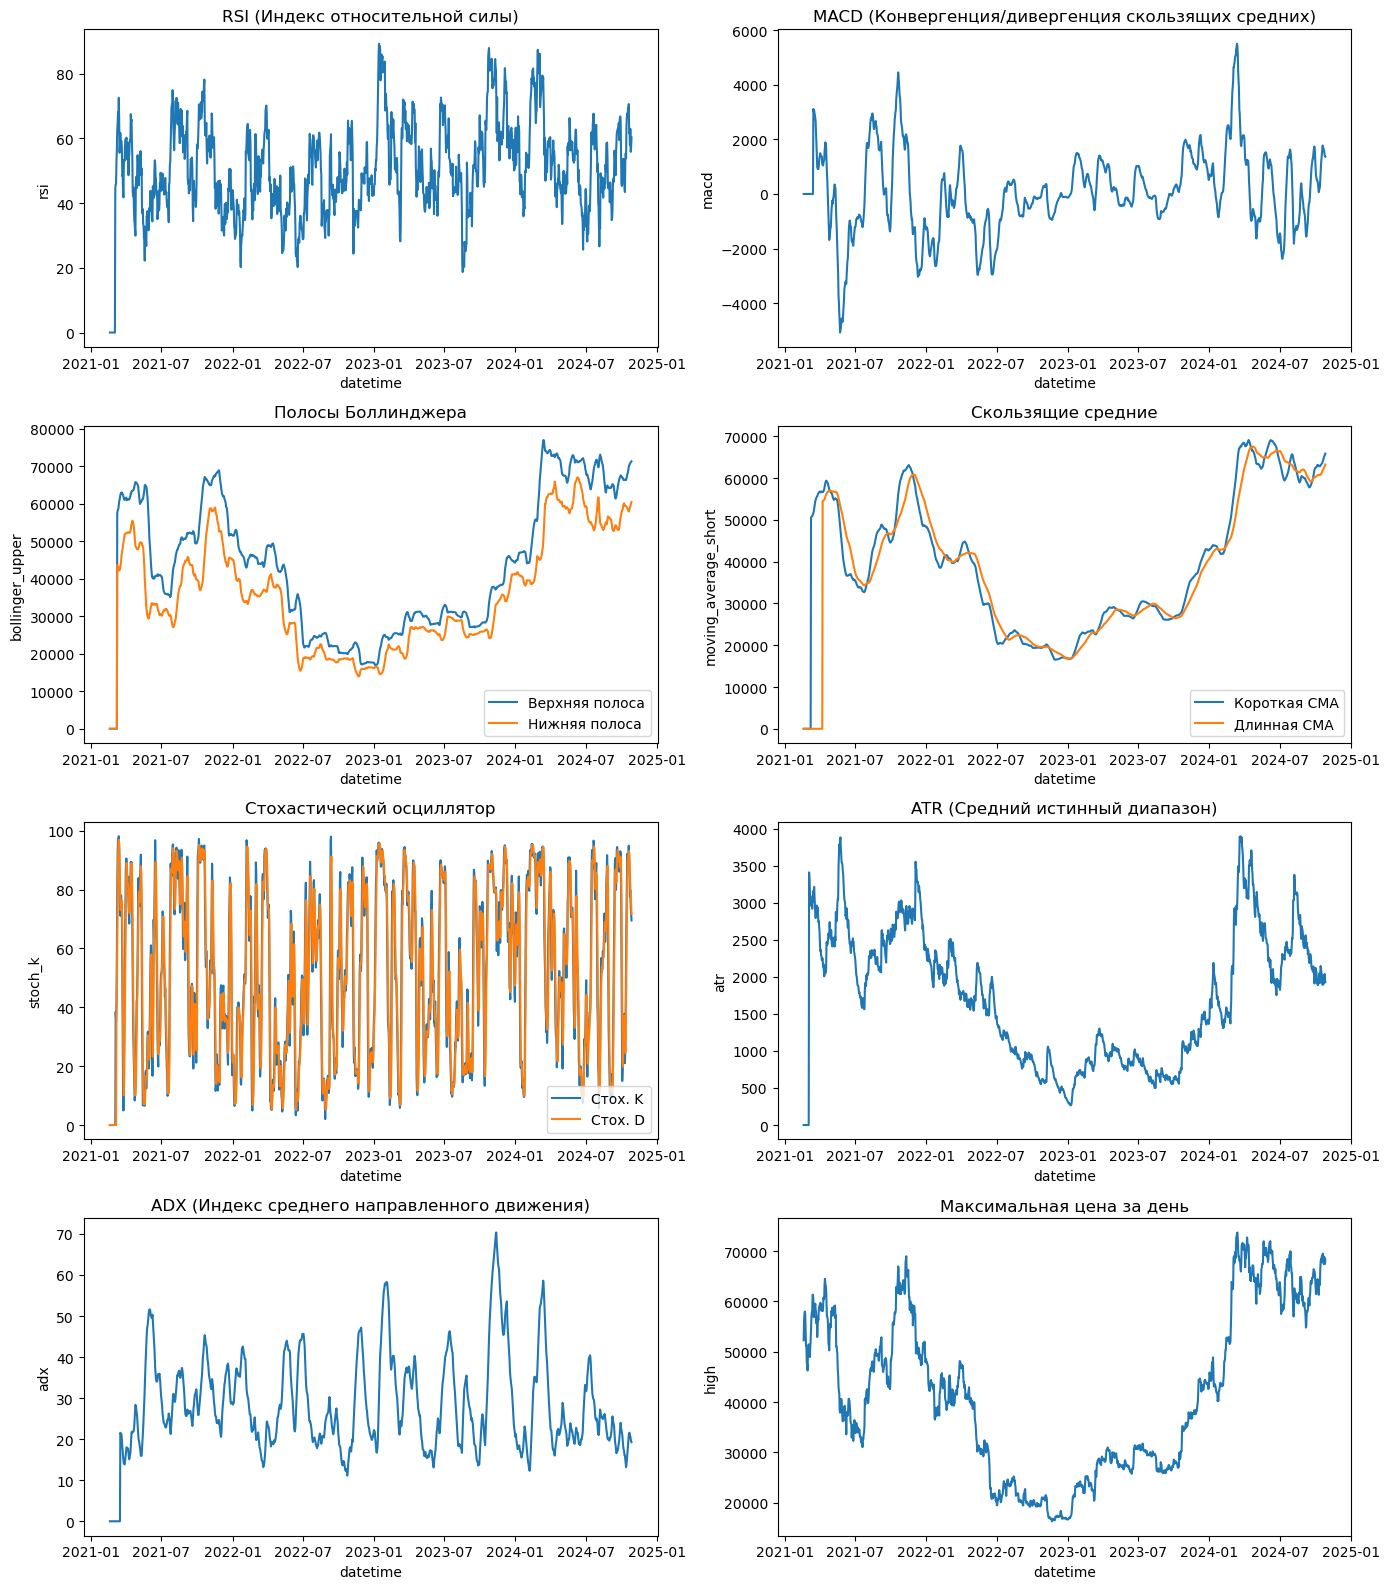

In [479]:
visualize_with_matplotlib(bitcoin_prices)

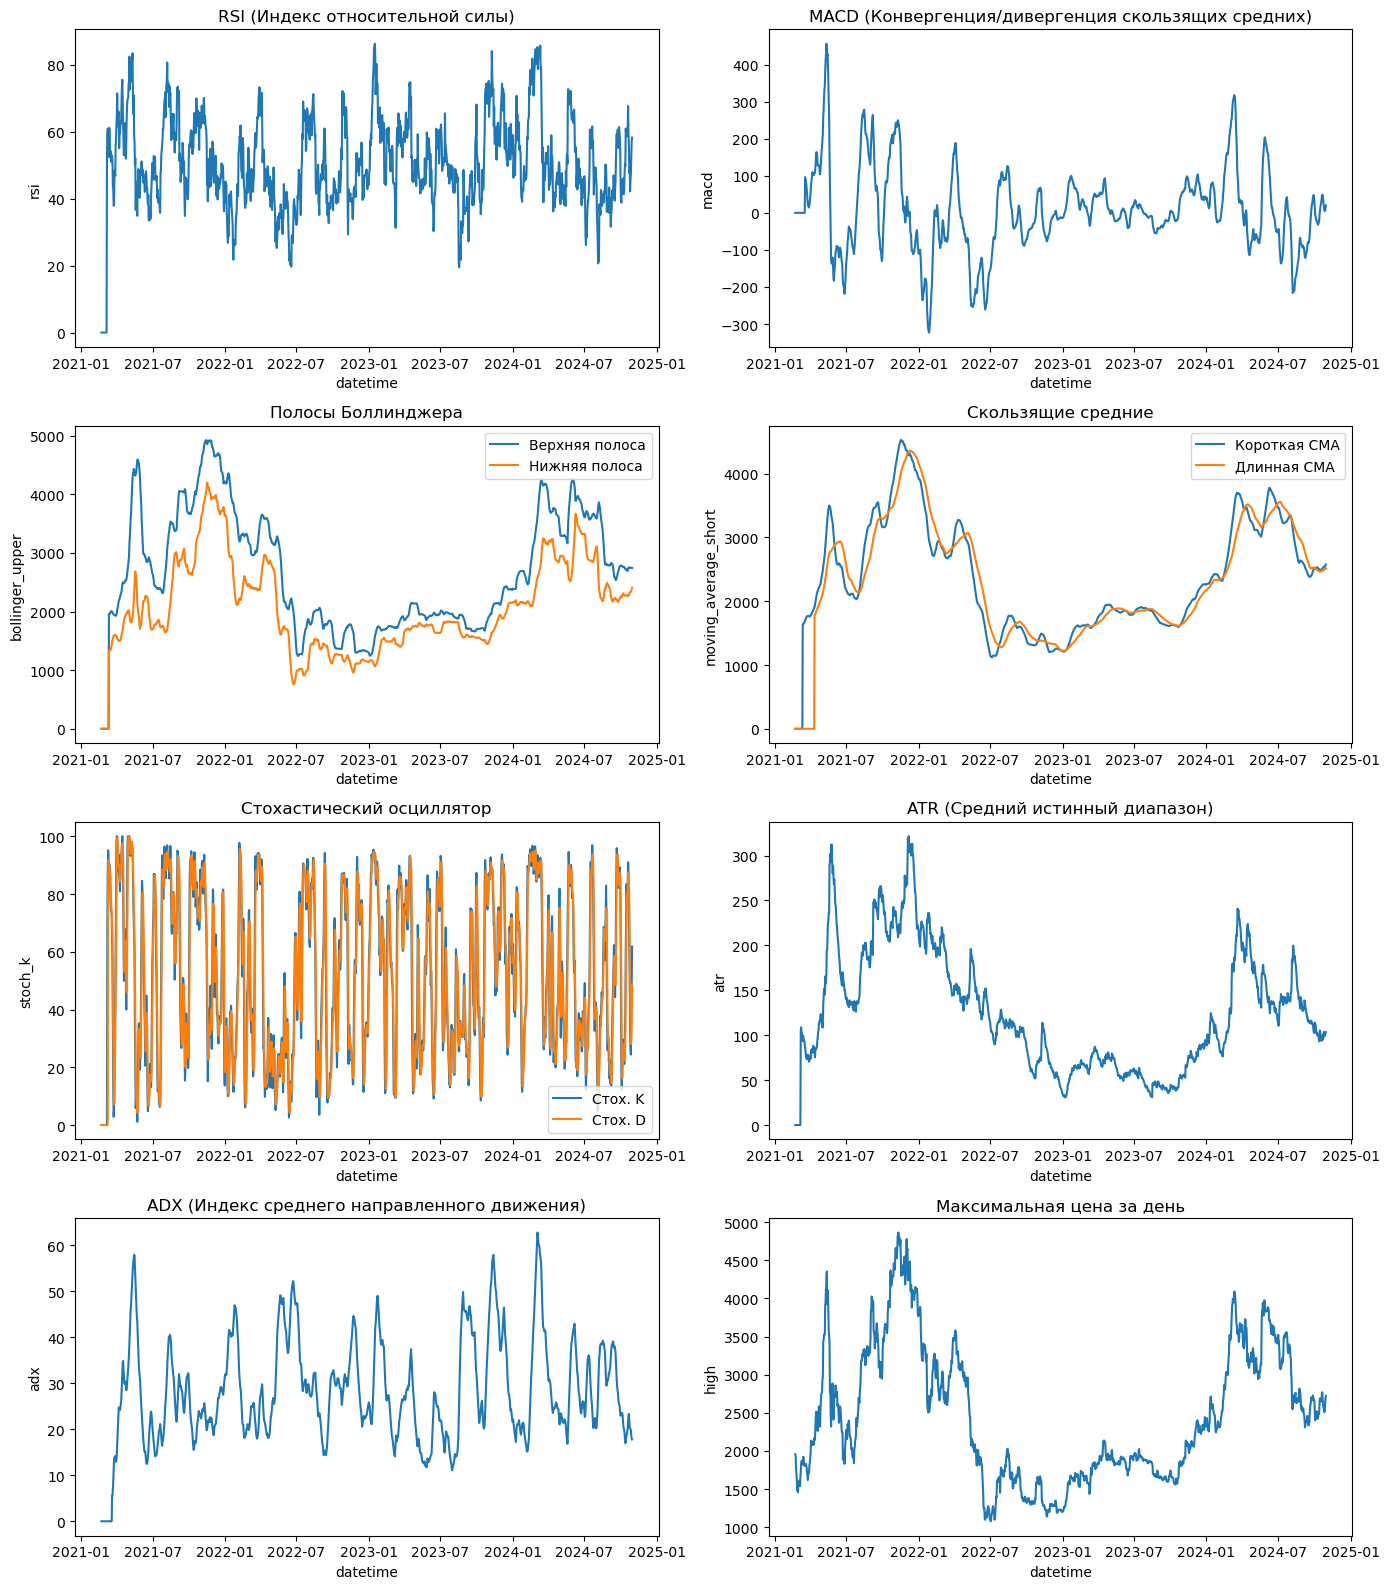

In [480]:
visualize_with_matplotlib(eth_prices)

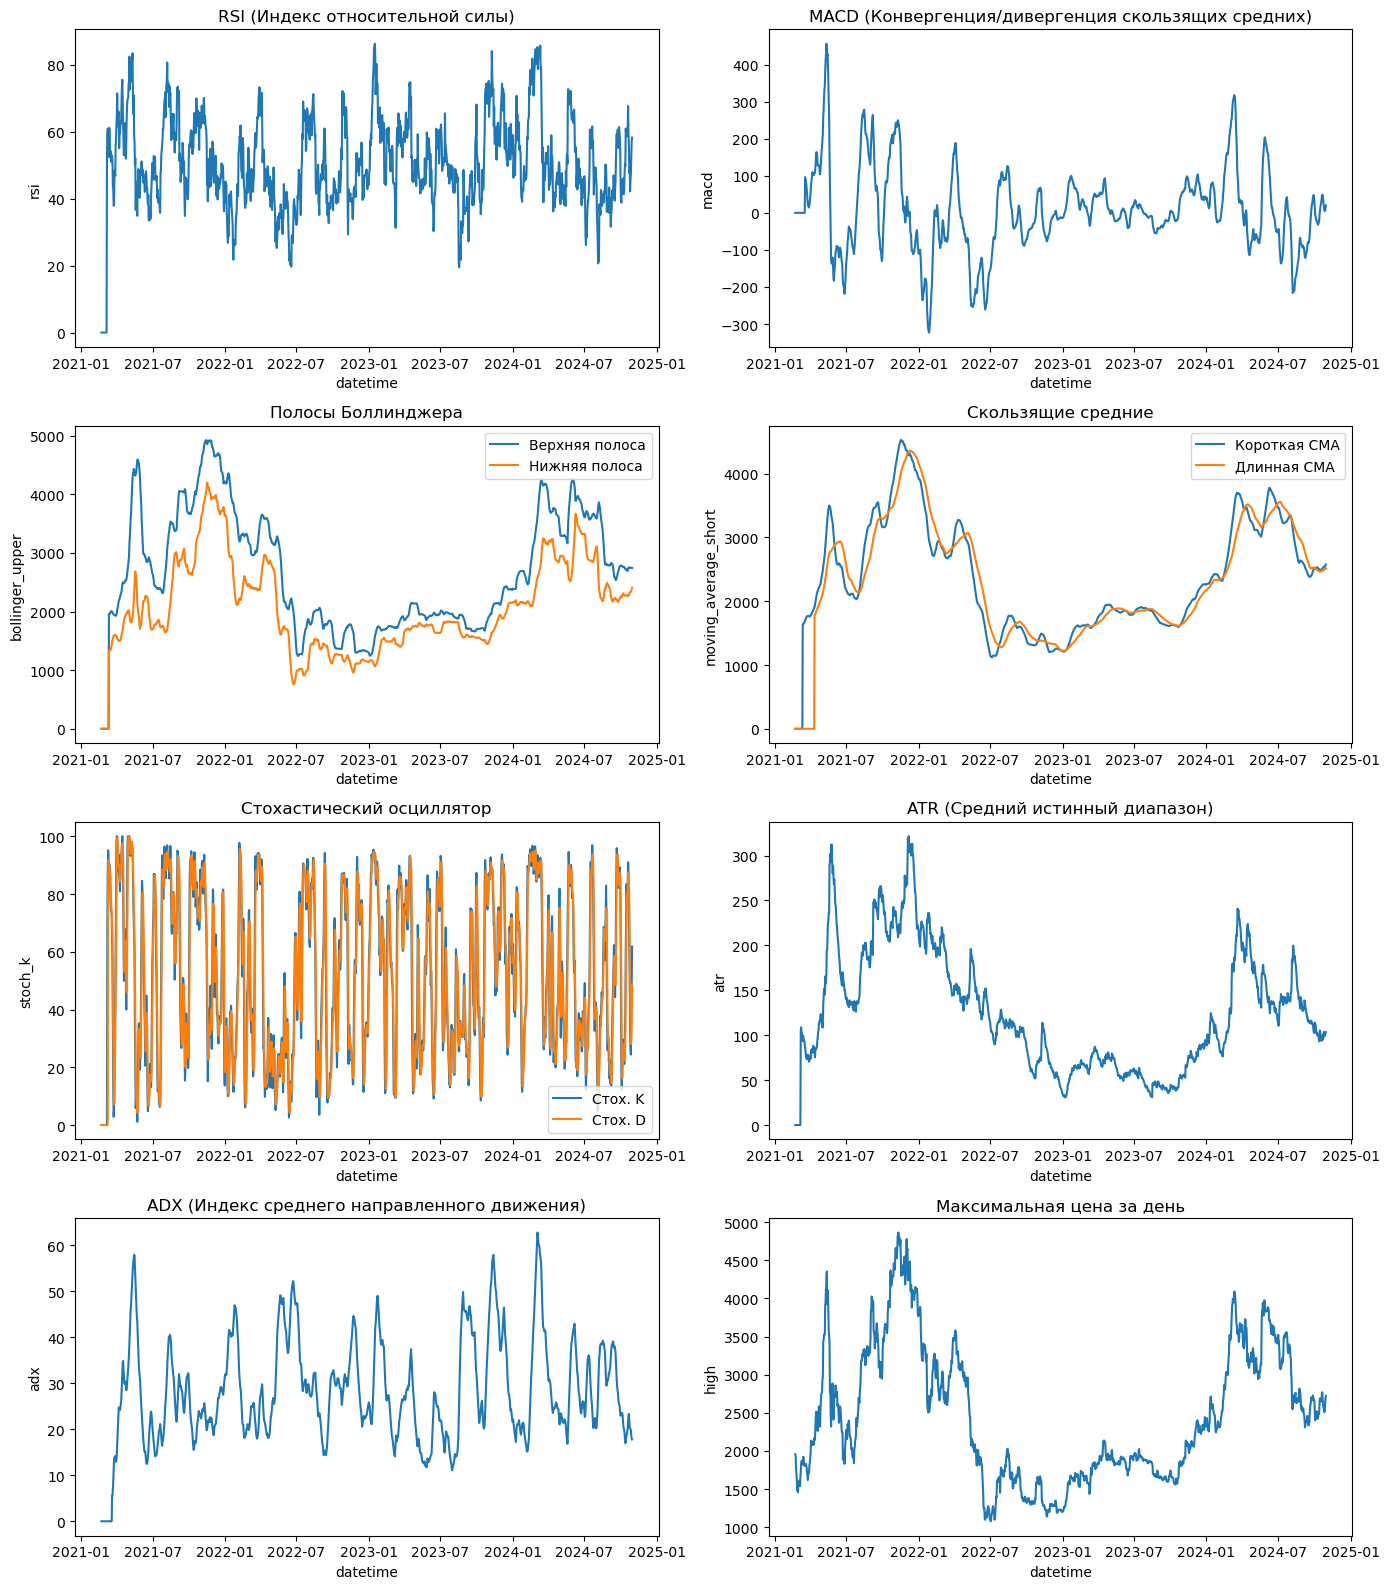

In [481]:
visualize_with_matplotlib(doge_prices)

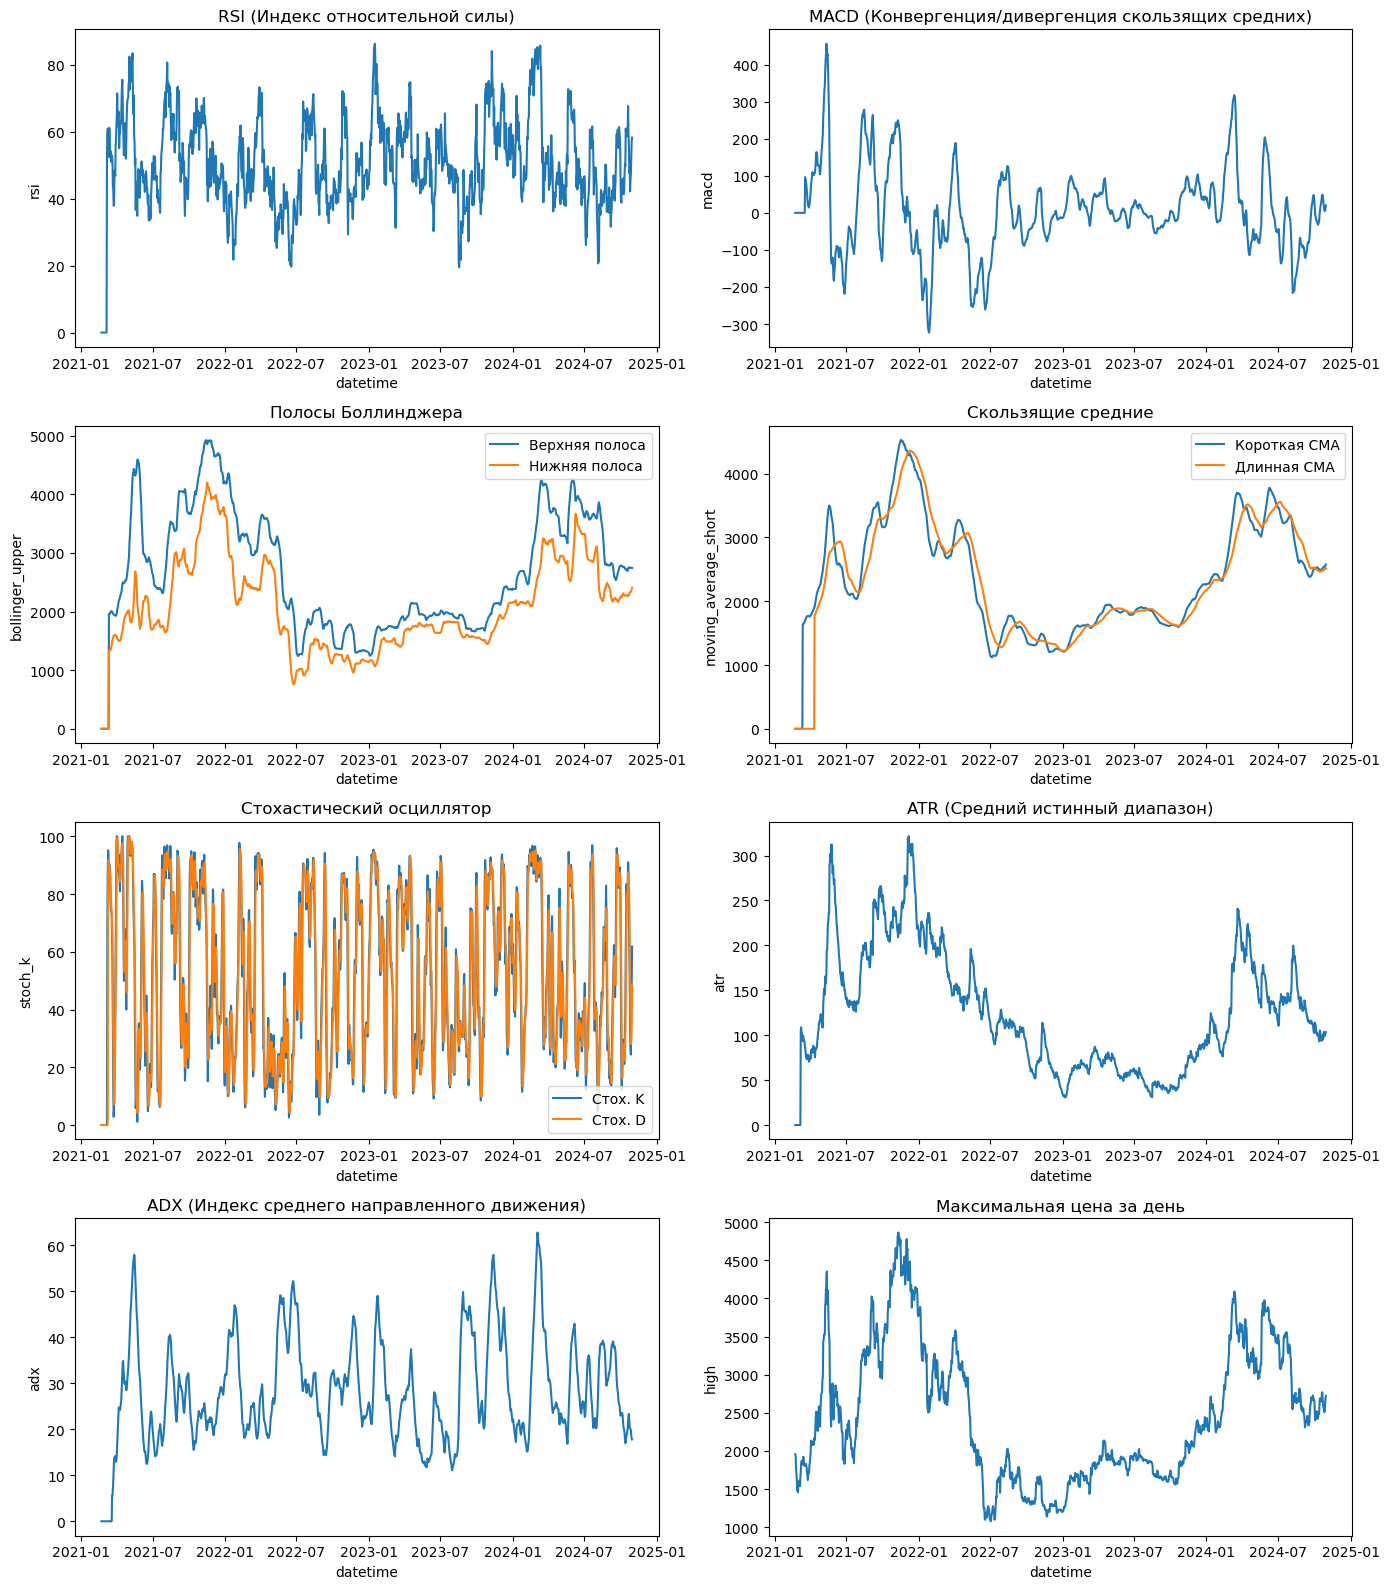

In [482]:
visualize_with_matplotlib(ripp_prices)

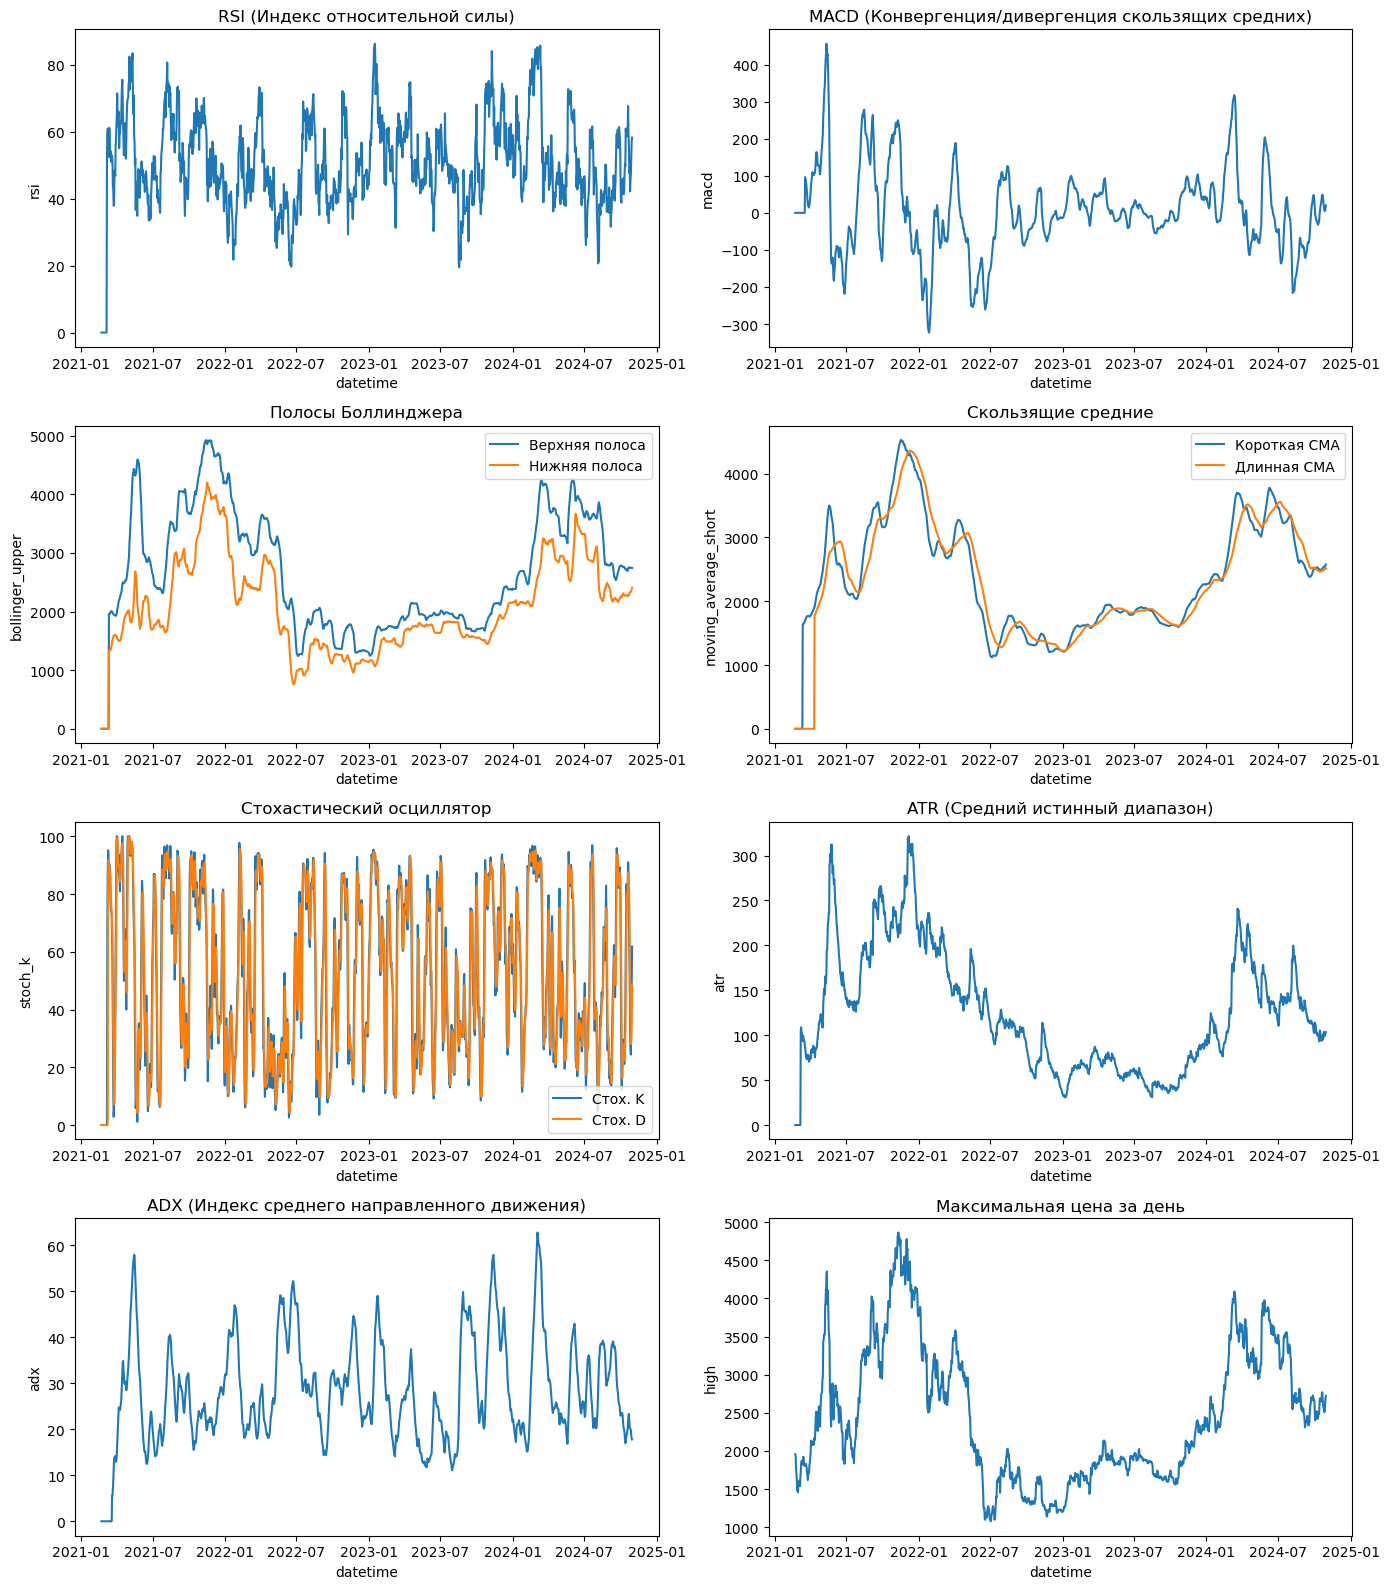

In [483]:
visualize_with_matplotlib(sol_prices)

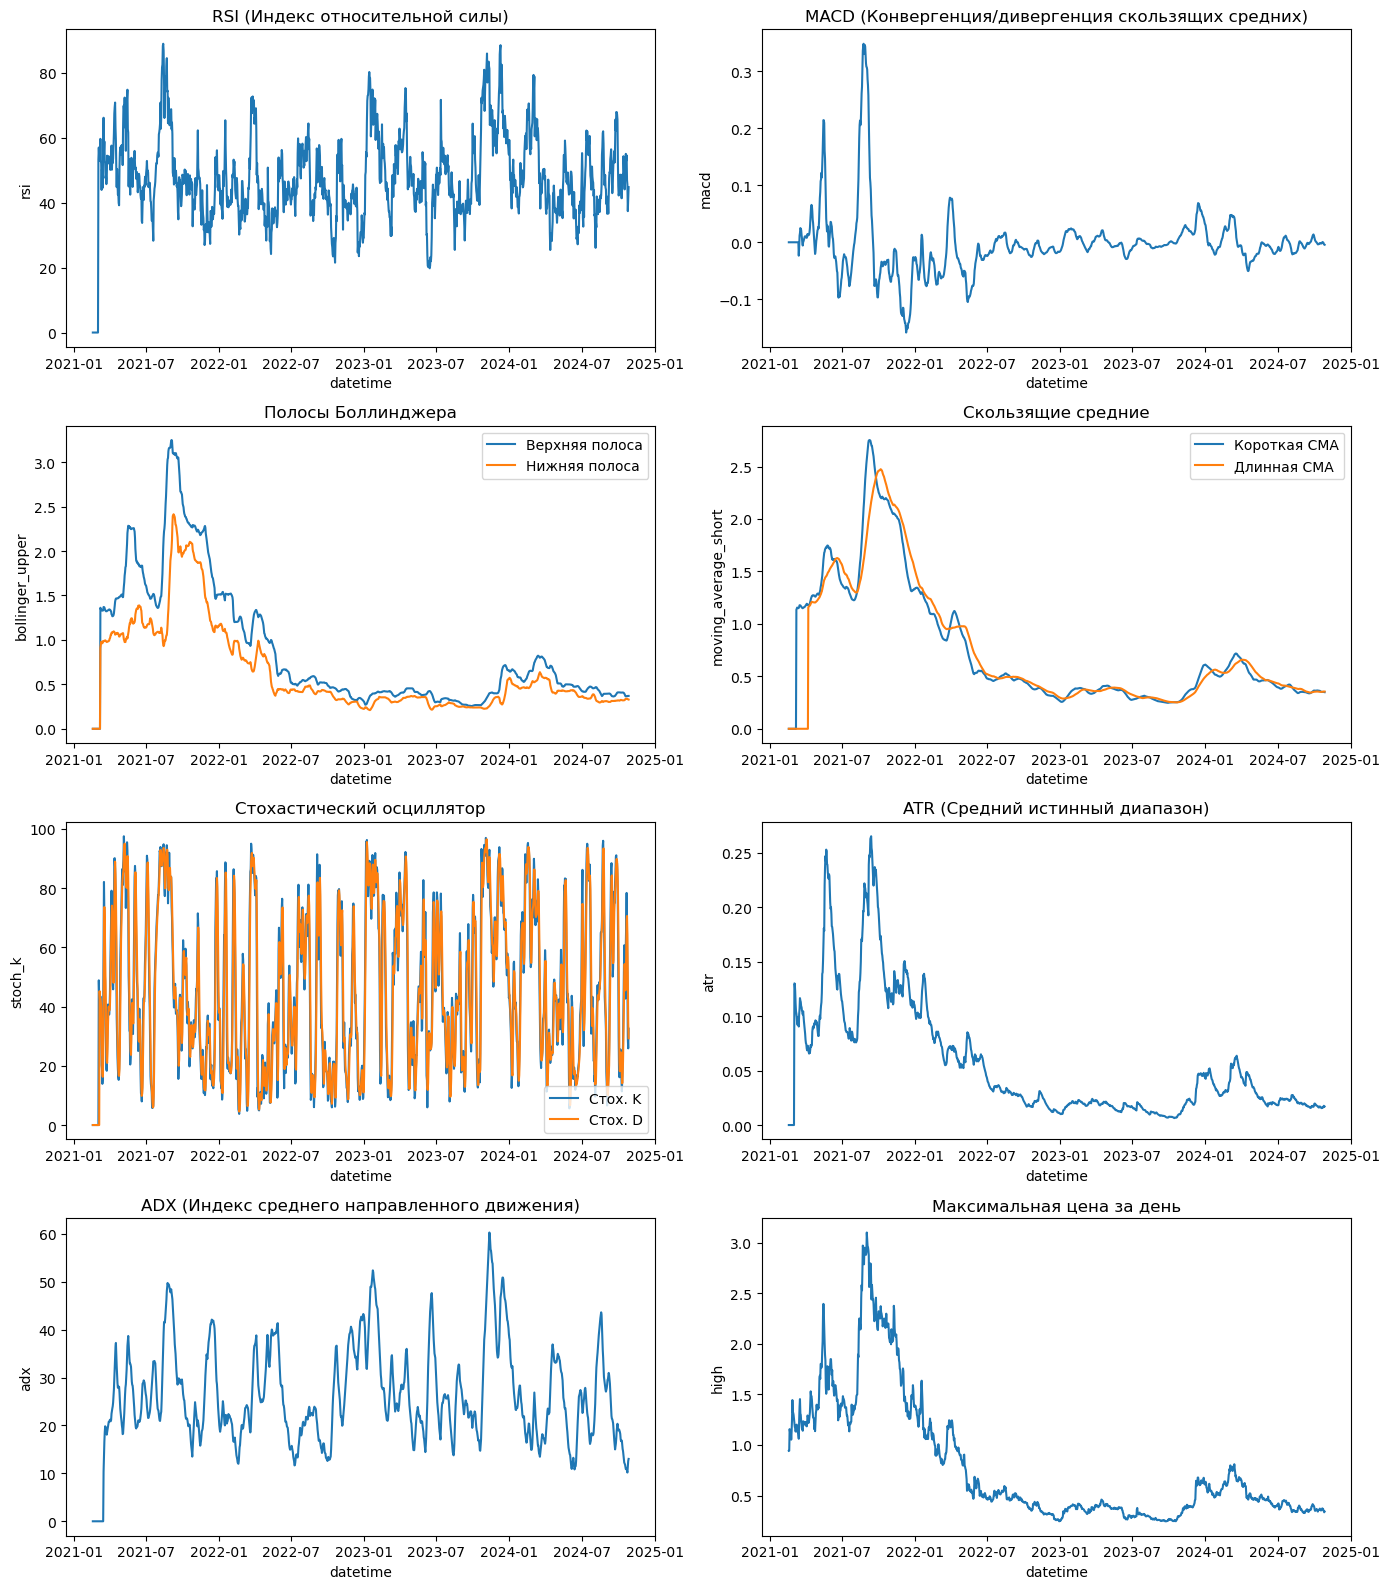

In [484]:
visualize_with_matplotlib(card_prices)

# Нормализация данных

In [485]:
def normalizer(some_data, train_split):
    some_data_mean = some_data.iloc[:train_split, 1:].mean()
    some_data_std = some_data.iloc[:train_split, 1:].std()

    some_data.iloc[:train_split, 1:] = (some_data.iloc[:train_split, 1:] - some_data_mean) / some_data_std
    return some_data, some_data_mean, some_data_std 

In [486]:
BITCOIN_train_split = 750
#bitcoin_data_clean, bitcoin_data_mean, bitcoin_data_std = normalizer(bitcoin_data_clean, BITCOIN_train_split)
bitcoin_data_clean

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-18         0         3          3      4         0         1   
1     2021-02-20         0        20         12     18         0         2   
2     2021-02-21        32        53         29     41        34        55   
3     2021-02-22        24         9         10     10         9         8   
4     2021-02-24         9        17          8     10         4        19   
..           ...       ...       ...        ...    ...       ...       ...   
965   2024-09-19        12        47         33     45        14        15   
966   2024-09-20         1        13          6     10         1         1   
967   2024-09-21        13        17          5     16        11         6   
968   2024-09-22         4        17          9     15         4         6   
969   2024-09-23         5        14         14     14         4         6   

            open          high           low  ...  moving_average_long  \
0    52186.66016  52293.968750  51392.230470  ...             0.000000   
1    56030.69922  57424.839840  55583.101560  ...             0.000000   
2    55904.64062  58004.070312  55610.691410  ...             0.000000   
3    57461.83984  57461.839840  52751.140620  ...             0.000000   
4    48915.60156  51172.578120  48759.261720  ...             0.000000   
..           ...           ...           ...  ...                  ...   
965  61720.12891  63847.960940  61620.011719  ...         59225.954531   
966  62971.71875  64079.988280  62373.988280  ...         59182.895156   
967  63196.00000  63525.988280  62790.101560  ...         59219.833593   
968  63389.53906  63993.968750  62378.218750  ...         59277.016796   
969  63582.23828  64705.859380  62706.500000  ...         59380.634140   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d          atr  \
0           0.000000         0.000000   0.000000   0.000000     0.000000   
1           0.000000         0.000000   0.000000   0.000000     0.000000   
2           0.000000         0.000000   0.000000   0.000000     0.000000   
3           0.000000         0.000000   0.000000   0.000000     0.000000   
4           0.000000         0.000000   0.000000   0.000000     0.000000   
..               ...              ...        ...        ...          ...   
965     62696.523914     53601.768271  93.495497  86.515851  2300.854019   
966     63407.105103     53313.892161  94.440206  91.357731  2258.364446   
967     64126.399775     53197.687332  92.099596  93.345100  2149.616037   
968     64750.957008     53016.358226  93.041683  93.193828  2111.482749   
969     65311.337481     53040.766816  90.816655  91.985978  2103.473937   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000     3  
1     0.000000    0.000000    0.000000    20  
2     0.000000    0.000000    0.000000    21  
3     0.000000    0.000000    0.000000   -15  
4     0.000000    0.000000    0.000000     8  
..         ...         ...         ...   ...  
965  16.722020   -8.260432  195.500496    35  
966  16.951551   -8.418951  180.873208    12  
967  17.164687   -7.021829  150.657180     4  
968  17.565340   -5.434172  129.785837    13  
969  18.240151  -15.094035  118.877324     9  

[970 rows x 24 columns]

In [487]:
ETH_train_split = 750
#eth_data_clean, eth_data_mean, eth_data_std = normalizer(eth_data_clean, ETH_train_split)
eth_data_clean

newsDatetime  negative  positive  important  liked  disliked  comments  \
0      2021-02-21         6         7          2      8         2         0   
1      2021-02-24         1         9          3      4         0         8   
2      2021-02-25        11        42         26     33         2         6   
3      2021-02-26         0        16          9     16         0         3   
4      2021-02-27        16         4          1      3        10         8   
...           ...       ...       ...        ...    ...       ...       ...   
998    2024-09-19         7        10          3      7         8         2   
999    2024-09-20         3        18          7     19         3        12   
1000   2024-09-21         4        14          3     15         5         4   
1001   2024-09-22         4        11          6     11         2         6   
1002   2024-09-23         2         3          2      3         2         3   

            open        high          low  ...  moving_average_long  \
0     1915.73999  1956.64001  1915.739990  ...             0.000000   
1     1577.40002  1697.73999  1565.859990  ...             0.000000   
2     1622.89001  1622.89001  1479.250000  ...             0.000000   
3     1482.26001  1482.26001  1444.130000  ...             0.000000   
4     1446.13000  1486.48999  1446.130000  ...             0.000000   
...          ...         ...          ...  ...                  ...   
998   2375.00000  2491.51001  2373.310060  ...          2540.184790   
999   2466.36011  2570.47998  2438.989990  ...          2527.313388   
1000  2562.47998  2619.73999  2530.090088  ...          2519.769985   
1001  2613.27002  2631.28003  2527.750000  ...          2513.296987   
1002  2579.79004  2701.54004  2544.889890  ...          2512.479389   

      bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0            0.000000         0.000000   0.000000   0.000000    0.000000   
1            0.000000         0.000000   0.000000   0.000000    0.000000   
2            0.000000         0.000000   0.000000   0.000000    0.000000   
3            0.000000         0.000000   0.000000   0.000000    0.000000   
4            0.000000         0.000000   0.000000   0.000000    0.000000   
...               ...              ...        ...        ...         ...   
998       2536.483053      2224.978909  72.882927  57.129550  114.382080   
999       2548.146032      2218.095910  86.541845  71.209784  115.604073   
1000      2584.966974      2199.849968  95.894680  85.106484  113.750204   
1001      2594.362661      2194.738290  94.097697  92.178074  113.020192   
1002      2633.951757      2177.598193  90.946861  93.646413  116.136617   

            adx  williams_r         cci  diff  
0      0.000000    0.000000    0.000000     1  
1      0.000000    0.000000    0.000000     8  
2      0.000000    0.000000    0.000000    31  
3      0.000000    0.000000    0.000000    16  
4      0.000000    0.000000    0.000000   -12  
...         ...         ...         ...   ...  
998   34.851632   -7.953890   70.306027     3  
999   32.545073   -2.611620  154.932056    15  
1000  30.856685   -1.750449  192.319574    10  
1001  29.394107  -13.344839  171.949649     7  
1002  28.649620  -12.064129  187.113564     1  

[1003 rows x 24 columns]

In [488]:
SOL_train_split = 550
#sol_data_clean, sol_data_mean, sol_data_std = normalizer(sol_data_clean, SOL_train_split)
sol_data_clean

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-23         1         3          2      1         0         1   
1     2021-02-24         0         4          0      1         0         1   
2     2021-03-11         2        11          6      9         2         3   
3     2021-03-28         0         6          1      8         0         1   
4     2021-04-03         0         1          0      2         0         0   
..           ...       ...       ...        ...    ...       ...       ...   
692   2024-09-18         5         5          2      4         5         0   
693   2024-09-19         2        21          4     22         2         5   
694   2024-09-21        10        23          1     25         8         5   
695   2024-09-22         4        17          4     17         5         4   
696   2024-09-23         3        11          0      9         3         0   

           open        high          low  ...  moving_average_long  \
0    1777.18994  1777.18994  1509.280030  ...             0.000000   
1    1577.40002  1697.73999  1565.859990  ...             0.000000   
2    1794.88000  1823.60999  1788.969970  ...             0.000000   
3    1711.84998  1712.81006  1687.270020  ...             0.000000   
4    2133.62012  2133.62012  2007.979980  ...             0.000000   
..          ...         ...          ...  ...                  ...   
692  2339.53003  2372.02002  2279.090088  ...          2555.529590   
693  2375.00000  2491.51001  2373.310060  ...          2540.184790   
694  2562.47998  2619.73999  2530.090088  ...          2519.769985   
695  2613.27002  2631.28003  2527.750000  ...          2513.296987   
696  2579.79004  2701.54004  2544.889890  ...          2512.479389   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0           0.000000         0.000000   0.000000   0.000000    0.000000   
1           0.000000         0.000000   0.000000   0.000000    0.000000   
2           0.000000         0.000000  92.141966  91.750495   96.085981   
3        1934.899692      1589.494302  41.589435  29.681703   70.530908   
4        2060.614382      1529.837596  92.695072  97.565024   84.125322   
..               ...              ...        ...        ...         ...   
692      2548.127143      2219.435820  54.204579  48.561065  113.989164   
693      2536.483053      2224.978909  72.882927  57.129550  114.382080   
694      2584.966974      2199.849968  95.894680  85.106484  113.750204   
695      2594.362661      2194.738290  94.097697  92.178074  113.020192   
696      2633.951757      2177.598193  90.946861  93.646413  116.136617   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000     2  
1     0.000000    0.000000    0.000000     4  
2     0.000000   -8.967230    0.000000     9  
3    14.165685  -55.786853  -65.926692     6  
4    18.986653  -21.914784  192.127743     1  
..         ...         ...         ...   ...  
692  36.861906  -29.808954  -40.438427     0  
693  34.851632   -7.953890   70.306027    19  
694  30.856685   -1.750449  192.319574    13  
695  29.394107  -13.344839  171.949649    13  
696  28.649620  -12.064129  187.113564     8  

[697 rows x 24 columns]

In [489]:
DOGE_train_split = 480
#doge_data_clean, doge_data_mean, doge_data_std = normalizer(doge_data_clean, DOGE_train_split)
doge_data_clean

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-21         5         1          2      3         1         7   
1     2021-02-25        14        10         15     22         4        47   
2     2021-03-01         7         0          2      1         0         2   
3     2021-03-03         0         4          3      3         0        34   
4     2021-03-04         0        13          5      9         2         6   
..           ...       ...       ...        ...    ...       ...       ...   
600   2024-09-17         0         0          0      0         0         1   
601   2024-09-19         0         0          0      0         0         1   
602   2024-09-21         0         1          0      1         0         0   
603   2024-09-22         0         0          0      1         0         0   
604   2024-09-23         0         1          1      2         0         0   

           open        high          low  ...  moving_average_long  \
0    1915.73999  1956.64001  1915.739990  ...             0.000000   
1    1622.89001  1622.89001  1479.250000  ...             0.000000   
2    1418.28003  1569.79004  1418.280030  ...             0.000000   
3    1485.66003  1609.56995  1485.660030  ...             0.000000   
4    1567.76001  1572.82996  1538.579960  ...             0.000000   
..          ...         ...          ...  ...                  ...   
600  2294.77002  2392.38989  2264.550050  ...          2573.666987   
601  2375.00000  2491.51001  2373.310060  ...          2540.184790   
602  2562.47998  2619.73999  2530.090088  ...          2519.769985   
603  2613.27002  2631.28003  2527.750000  ...          2513.296987   
604  2579.79004  2701.54004  2544.889890  ...          2512.479389   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0           0.000000         0.000000   0.000000   0.000000    0.000000   
1           0.000000         0.000000   0.000000   0.000000    0.000000   
2           0.000000         0.000000   0.000000   0.000000    0.000000   
3           0.000000         0.000000   0.000000   0.000000    0.000000   
4           0.000000         0.000000   0.000000   0.000000    0.000000   
..               ...              ...        ...        ...         ...   
600      2567.505619      2215.726338  44.301146  50.032680  115.609104   
601      2536.483053      2224.978909  72.882927  57.129550  114.382080   
602      2584.966974      2199.849968  95.894680  85.106484  113.750204   
603      2594.362661      2194.738290  94.097697  92.178074  113.020192   
604      2633.951757      2177.598193  90.946861  93.646413  116.136617   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000    -4  
1     0.000000    0.000000    0.000000    -4  
2     0.000000    0.000000    0.000000    -7  
3     0.000000    0.000000    0.000000     4  
4     0.000000    0.000000    0.000000    13  
..         ...         ...         ...   ...  
600  37.402725  -43.588375  -54.009449     0  
601  34.851632   -7.953890   70.306027     0  
602  30.856685   -1.750449  192.319574     1  
603  29.394107  -13.344839  171.949649     0  
604  28.649620  -12.064129  187.113564     1  

[605 rows x 24 columns]

In [490]:
RIPP_train_split = 650
#ripp_data_clean, ripp_data_mean, ripp_data_std = normalizer(ripp_data_clean, RIPP_train_split)
ripp_data_clean

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-24         9        13          5      8         4        19   
1     2021-02-25        11         7          6      5         1         2   
2     2021-02-27         4         0          1      0         2         0   
3     2021-02-28        10        38         17     27         5        10   
4     2021-03-03        10        22          9     13         2        15   
..           ...       ...       ...        ...    ...       ...       ...   
819   2024-09-19         1         7          2      6         2         1   
820   2024-09-20         2         8          2      6         1         0   
821   2024-09-21         0         2          1      2         0         1   
822   2024-09-22         0         3          2      4         0         2   
823   2024-09-23         1         0          1      0         1         3   

           open        high          low  ...  moving_average_long  \
0    1577.40002  1697.73999  1565.859990  ...             0.000000   
1    1622.89001  1622.89001  1479.250000  ...             0.000000   
2    1446.13000  1486.48999  1446.130000  ...             0.000000   
3    1457.93994  1457.93994  1353.890010  ...             0.000000   
4    1485.66003  1609.56995  1485.660030  ...             0.000000   
..          ...         ...          ...  ...                  ...   
819  2375.00000  2491.51001  2373.310060  ...          2540.184790   
820  2466.36011  2570.47998  2438.989990  ...          2527.313388   
821  2562.47998  2619.73999  2530.090088  ...          2519.769985   
822  2613.27002  2631.28003  2527.750000  ...          2513.296987   
823  2579.79004  2701.54004  2544.889890  ...          2512.479389   

     bollinger_upper  bollinger_lower    stoch_k    stoch_d         atr  \
0           0.000000         0.000000   0.000000   0.000000    0.000000   
1           0.000000         0.000000   0.000000   0.000000    0.000000   
2           0.000000         0.000000   0.000000   0.000000    0.000000   
3           0.000000         0.000000   0.000000   0.000000    0.000000   
4           0.000000         0.000000   0.000000   0.000000    0.000000   
..               ...              ...        ...        ...         ...   
819      2536.483053      2224.978909  72.882927  57.129550  114.382080   
820      2548.146032      2218.095910  86.541845  71.209784  115.604073   
821      2584.966974      2199.849968  95.894680  85.106484  113.750204   
822      2594.362661      2194.738290  94.097697  92.178074  113.020192   
823      2633.951757      2177.598193  90.946861  93.646413  116.136617   

           adx  williams_r         cci  diff  
0     0.000000    0.000000    0.000000     4  
1     0.000000    0.000000    0.000000    -4  
2     0.000000    0.000000    0.000000    -4  
3     0.000000    0.000000    0.000000    28  
4     0.000000    0.000000    0.000000    12  
..         ...         ...         ...   ...  
819  34.851632   -7.953890   70.306027     6  
820  32.545073   -2.611620  154.932056     6  
821  30.856685   -1.750449  192.319574     2  
822  29.394107  -13.344839  171.949649     3  
823  28.649620  -12.064129  187.113564    -1  

[824 rows x 24 columns]

In [491]:
CARD_train_split = 700
#card_data_clean, card_data_mean, card_data_std = normalizer(card_data_clean, CARD_train_split)
card_data_clean

newsDatetime  negative  positive  important  liked  disliked  comments  \
0     2021-02-18         1         0          0      1         1         0   
1     2021-02-19         2        28          8     16         1        21   
2     2021-02-20         1         1          2     10         0         2   
3     2021-02-22         6         7          1      5         2         1   
4     2021-02-24         1         6          2      3         0         0   
..           ...       ...       ...        ...    ...       ...       ...   
882   2024-09-19        20        26         17     26        21        13   
883   2024-09-20        15        16         11     17        16        10   
884   2024-09-21        15        12          5     12        15         3   
885   2024-09-22         1         0          0      0         0         0   
886   2024-09-23         3         3          1      2         3         1   

        open     high      low  ...  moving_average_long  bollinger_upper  \
0    0.89348  0.94203  0.89348  ...             0.000000         0.000000   
1    0.91725  0.94315  0.88551  ...             0.000000         0.000000   
2    0.93065  1.15652  0.92569  ...             0.000000         0.000000   
3    1.10127  1.12764  0.97611  ...             0.000000         0.000000   
4    0.96500  1.05291  0.96500  ...             0.000000         0.000000   
..       ...      ...      ...  ...                  ...              ...   
882  0.34420  0.35630  0.34420  ...             0.345570         0.363655   
883  0.35140  0.36120  0.34910  ...             0.344758         0.364585   
884  0.35220  0.35980  0.35050  ...             0.344650         0.367053   
885  0.35840  0.35920  0.34320  ...             0.344394         0.368235   
886  0.35140  0.36550  0.34590  ...             0.344792         0.370250   

     bollinger_lower    stoch_k    stoch_d       atr        adx  williams_r  \
0           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
1           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
2           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
3           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
4           0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
..               ...        ...        ...       ...        ...         ...   
882         0.312865  64.161204  55.700777  0.016496  19.203731  -22.549020   
883         0.312655  72.608034  63.200485  0.016182  17.998668  -25.149721   
884         0.312907  78.815860  71.861699  0.015691  16.879682  -15.853679   
885         0.313275  74.930985  75.451626  0.015713  16.048015  -34.203646   
886         0.315820  81.946712  78.564519  0.015991  15.011209   -4.102538   

            cci  diff  
0      0.000000    -1  
1      0.000000    26  
2      0.000000     0  
3      0.000000     1  
4      0.000000     5  
..          ...   ...  
882   82.255106     6  
883  100.132691     1  
884   99.605485    -3  
885   64.167503    -1  
886   97.791950     0  

[887 rows x 24 columns]

In [492]:
#BITCOIN_train_split_new = 600
#bitcoin_data_new = normalizer(bitcoin_data_new, BITCOIN_train_split_new)
#bitcoin_data_new 

In [493]:
#ETH_train_split_new = 600
#eth_data_new = normalizer(eth_data_new, ETH_train_split_new)
#eth_data_new 

In [494]:
TRAIN_SPLIT = 800

# Model 1 Прогнозирование на основе одномерного временного ряда

In [495]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [496]:
def create_time_steps(length):
  return list(range(-length, 0))

In [497]:
def show_plot(plot_data, delta, title, ax_n=False,  graph_count=1):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0
  if ax_n:
      plt.subplot(graph_count, 1, ax_n)
  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [498]:
def baseline(history):
  return np.mean(history)

In [499]:
def plot_train_history(history, title, ax_n=False, graph_count=1):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  if ax_n:
      plt.subplot(graph_count, 1, ax_n)
  else:
      plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  return plt

In [500]:
def use_first_model(some_data_clean, TRAIN_SPLIT):
    fig, axs = plt.subplots(6, 1, figsize=(15, 48))

    uni_data = some_data_clean['close']
    uni_data.index = some_data_clean['newsDatetime']
    uni_data = uni_data.values
    
    uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
    uni_train_std = uni_data[:TRAIN_SPLIT].std()

    uni_data = (uni_data-uni_train_mean)/uni_train_std


    univariate_past_history = 20
    univariate_future_target = 0
    
    x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                               univariate_past_history,
                                               univariate_future_target)
    x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                           univariate_past_history,
                                           univariate_future_target)

    show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example', ax_n=1, graph_count=6)

    show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,'Baseline Prediction Example', ax_n=2, graph_count=6)

    BATCH_SIZE = 64
    BUFFER_SIZE = 10000
    
    train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
    train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
    
    val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
    val_univariate = val_univariate.batch(BATCH_SIZE).repeat()


    simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
    ])
    
    simple_lstm_model.compile(optimizer='adam', loss='mae')
    
    #Проверим выход модели.
    # for x, y in val_univariate.take(1):
    #     print(simple_lstm_model.predict(x).shape)
    
    EVALUATION_INTERVAL = 200
    EPOCHS = 30
    
    single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                          steps_per_epoch=EVALUATION_INTERVAL,
                          validation_data=val_univariate, validation_steps=50)
    plot_train_history(single_step_history, 'Single Step Training and validation loss', ax_n=3,  graph_count=6)
    subplot_ind = 4
    for x, y in val_univariate.take(3):
        plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model', ax_n=subplot_ind, graph_count=6)
        subplot_ind += 1 
    plot.show()

Epoch 1/30
 84/200 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8144

KeyboardInterrupt: 

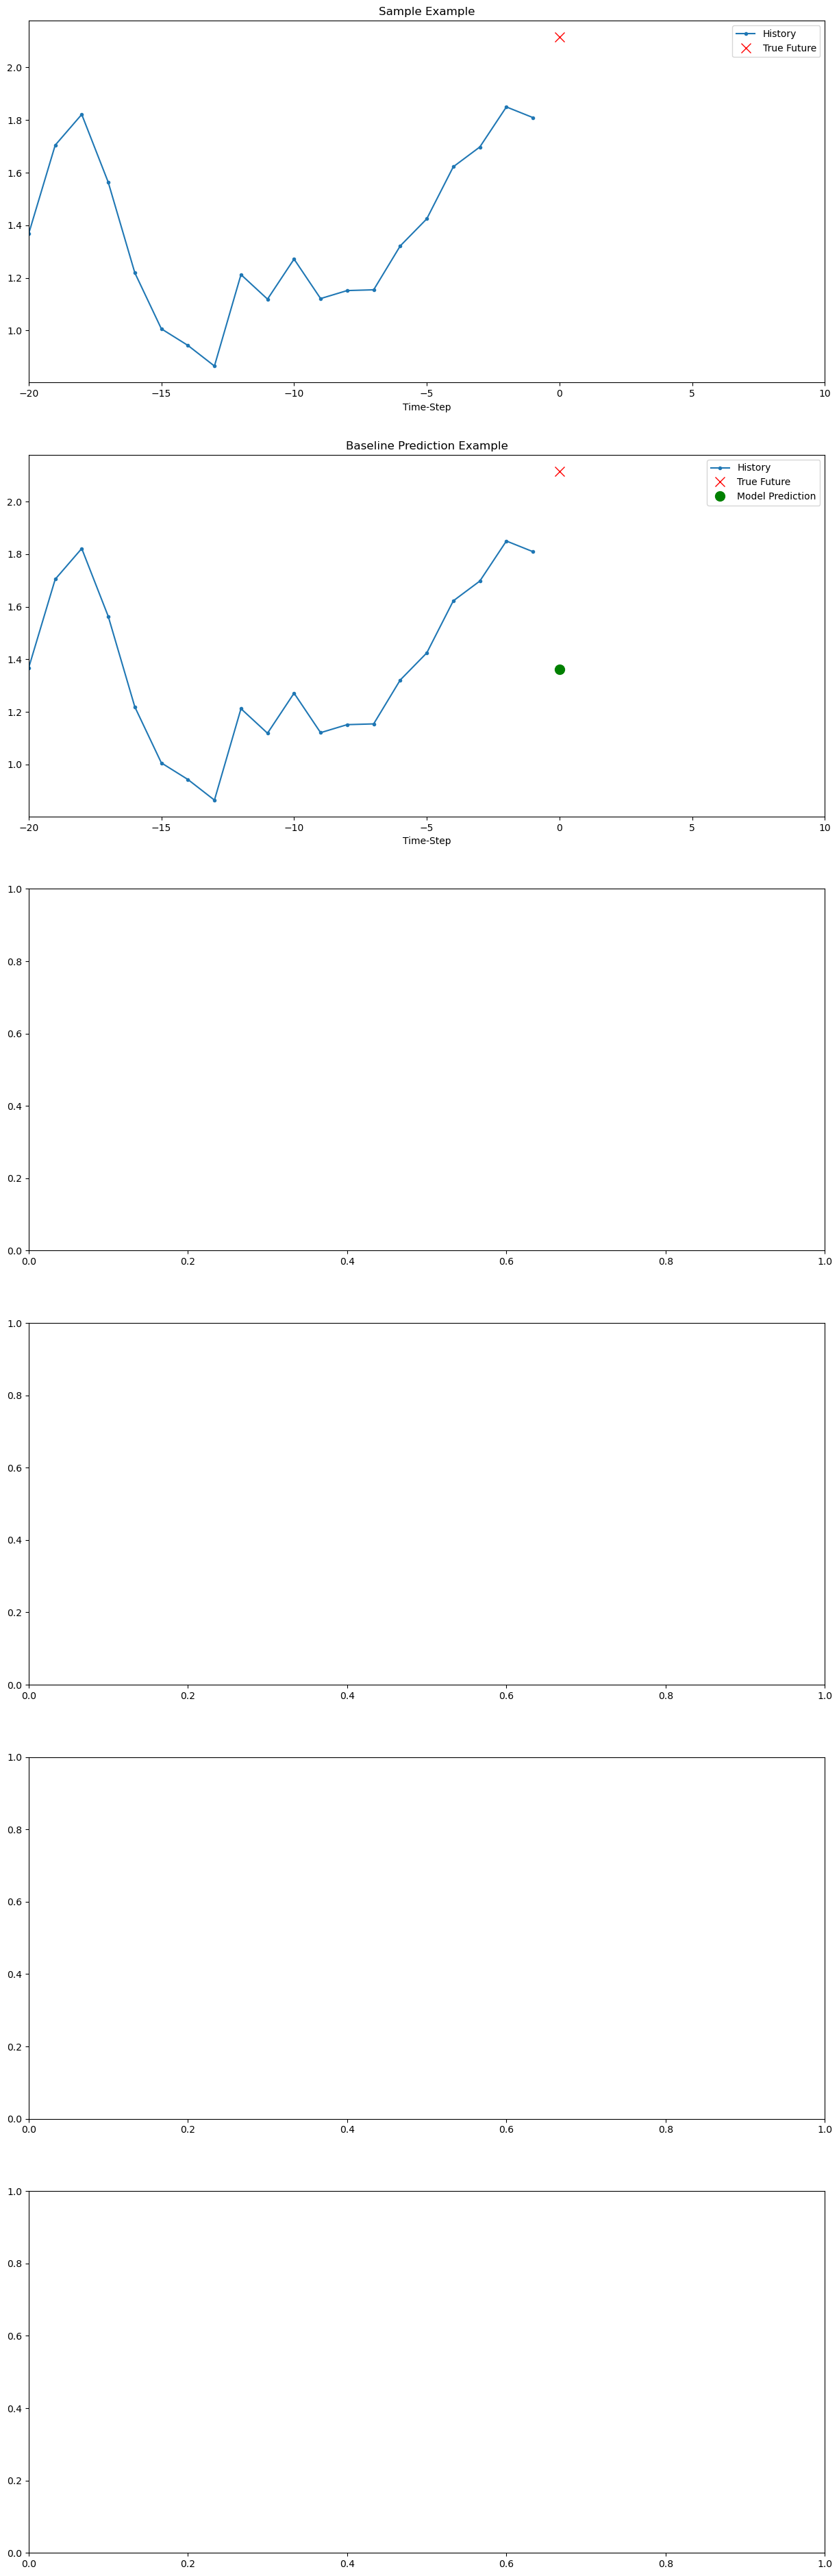

In [501]:
use_first_model(bitcoin_data_clean, BITCOIN_train_split)

In [ ]:
use_first_model(eth_data_clean, ETH_train_split)

In [ ]:
use_first_model(sol_data_clean, SOL_train_split)

In [ ]:
use_first_model(doge_data_clean, DOGE_train_split)

In [ ]:
use_first_model(ripp_data_clean, RIPP_train_split)

In [ ]:
use_first_model(card_data_clean, CARD_train_split)

# Model 2

In [ ]:
def use_second_model(some_data_clean, TRAIN_SPLIT):

    fig, axs = plt.subplots(4, 1, figsize=(15, 32))
    
    uni_data = some_data_clean['close']
    uni_data.index = some_data_clean['newsDatetime']
    uni_data = uni_data.values
    
    uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
    uni_train_std = uni_data[:TRAIN_SPLIT].std()

    uni_data = (uni_data-uni_train_mean)/uni_train_std


    univariate_past_history = 20
    univariate_future_target = 0
    
    x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                               univariate_past_history,
                                               univariate_future_target)
    x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                           univariate_past_history,
                                           univariate_future_target)
    simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16, return_sequences=True, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
    
    #simple_lstm_model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(clipvalue=1.0), loss='mae')
    simple_lstm_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
    
    EVALUATION_INTERVAL = 200
    EPOCHS = 30
    
    single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                          steps_per_epoch=EVALUATION_INTERVAL,
                          validation_data=val_univariate, validation_steps=50)
    plot_train_history(single_step_history, 'Single Step Training and validation loss', ax_n=1, graph_count=4)

    subplot_ind = 2
    for x, y in val_univariate.take(3):
      plot = show_plot([x[0].numpy(), y[0].numpy(),
                        simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model', ax_n=subplot_ind, graph_count=4)
      subplot_ind += 1
    plot.show()

In [ ]:
use_second_model(bitcoin_data_clean, BITCOIN_train_split)

In [ ]:
use_second_model(eth_data_clean, ETH_train_split)

In [ ]:
use_second_model(sol_data_clean, SOL_train_split)

In [ ]:
use_second_model(ripp_data_clean, RIPP_train_split)

In [ ]:
use_second_model(doge_data_clean, DOGE_train_split)

In [ ]:
use_second_model(card_data_clean, CARD_train_split)

# Model 3 Прогнозирование на основе многомерного временного ряда

In [ ]:
price_features_considered = ['close', 'macd', 'moving_average_short', 'moving_average_long',
       'bollinger_upper', 'bollinger_lower', 'stoch_k', 'stoch_d', 'atr', 'adx', 'williams_r', 'cci']
news_features_considered = ['negative', 'positive', 'important', 'liked', 'disliked', 'comments', 'diff']

# Сравнение двух временных рядов

In [ ]:
## корреляционнная матрица
def draw_corr_matr(some_data):
    corr_matr = some_data[['diff', 'positive', 'negative', 'bollinger_lower', 'stoch_k', 'stoch_d', 'atr', 'adx', 'williams_r',  'cci', 'close']].corr()
    sns.heatmap(corr_matr, annot=True, cmap='coolwarm') 

In [ ]:
draw_corr_matr(eth_data_clean)

In [ ]:
draw_corr_matr(bitcoin_data_clean)

In [ ]:
draw_corr_matr(sol_data_clean)

In [ ]:
draw_corr_matr(doge_data_clean)

In [ ]:
draw_corr_matr(ripp_data_clean)

In [ ]:
draw_corr_matr(card_data_clean)

In [502]:
# Применение теста Колмогорова-Смирнова
def kolm_smirnov(some_data):
    time = some_data['newsDatetime']
    
    series1 = (some_data['close'] - some_data['close'].mean()) / some_data['close'].std()
    series1.index = some_data['newsDatetime']
    
    series2 = (some_data['diff'] - some_data['diff'].mean()) / some_data['diff'].std()
    series1.index = some_data['newsDatetime']
    
    ks_stat, p_value = ks_2samp(series1, series2)
    
    # Вывод результатов
    print(f"Статистика теста Колмогорова-Смирнова: {ks_stat}")
    print(f"p-value: {p_value}")
    
    # Интерпретация результатов
    alpha = 0.05
    if p_value < alpha:
        print("Распределения двух временных рядов статистически различны.")
    else:
        print("Невозможно отвергнуть гипотезу, что распределения двух временных рядов одинаковы.")
    
    # Визуализация данных для сравнения
    plt.figure(figsize=(10, 6))
    plt.plot(time, series1, label="Series 1", linestyle='-', color='blue')
    plt.plot(time, series2, label="Series 2", linestyle='--', color='red')
    plt.title("Сравнение двух временных рядов")
    plt.xlabel("Время")
    plt.ylabel("Значение")
    plt.legend()
    plt.show()

Статистика теста Колмогорова-Смирнова: 0.15257731958762888
p-value: 2.888931405063719e-10
Распределения двух временных рядов статистически различны.


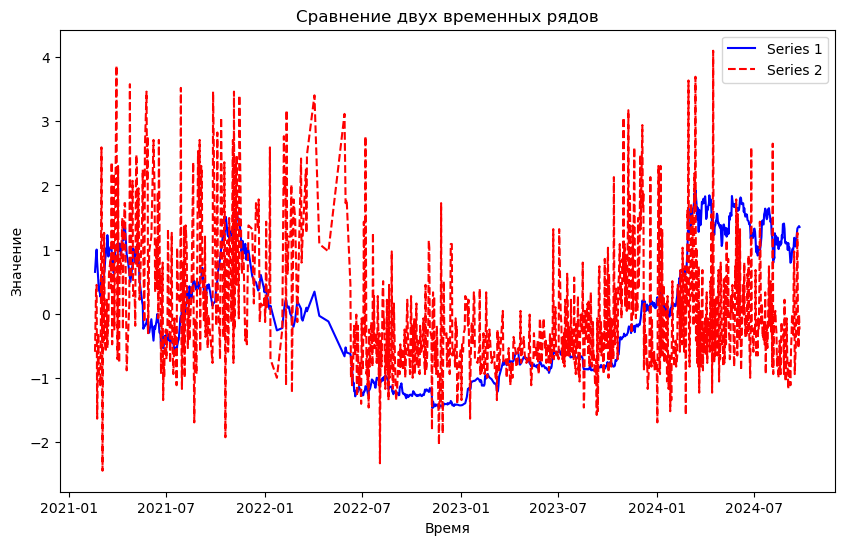

In [503]:
kolm_smirnov(bitcoin_data_clean)

Статистика теста Колмогорова-Смирнова: 0.11864406779661017
p-value: 1.4387695583090497e-06
Распределения двух временных рядов статистически различны.


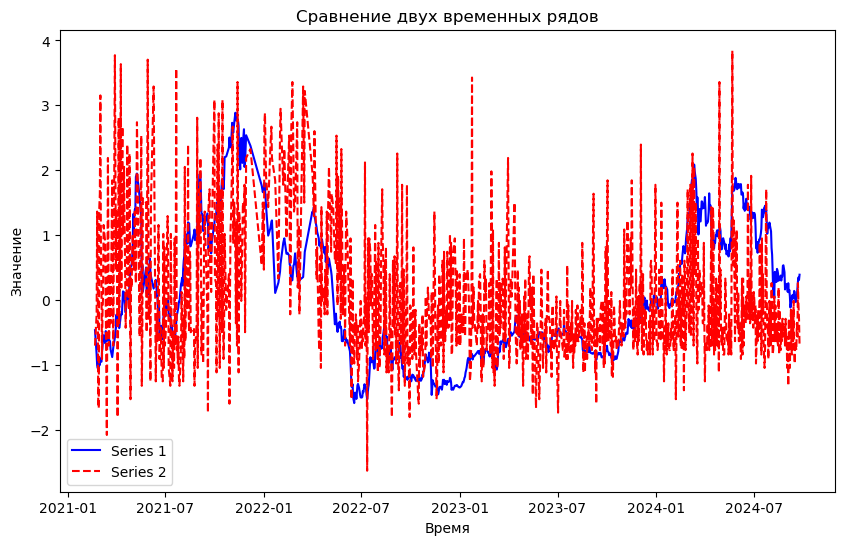

In [504]:
kolm_smirnov(eth_data_clean)

Статистика теста Колмогорова-Смирнова: 0.15781922525107603
p-value: 5.438623798173594e-08
Распределения двух временных рядов статистически различны.


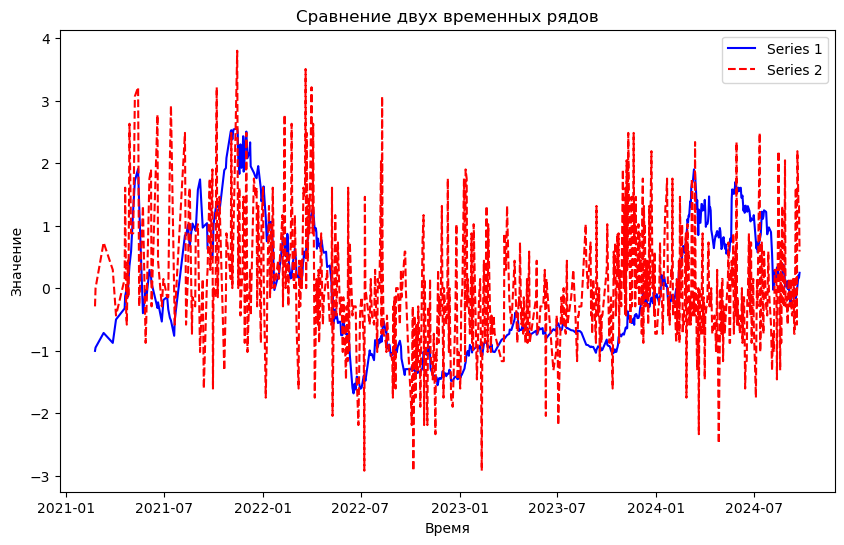

In [505]:
kolm_smirnov(sol_data_clean)

Статистика теста Колмогорова-Смирнова: 0.14710743801652892
p-value: 3.97249109279711e-06
Распределения двух временных рядов статистически различны.


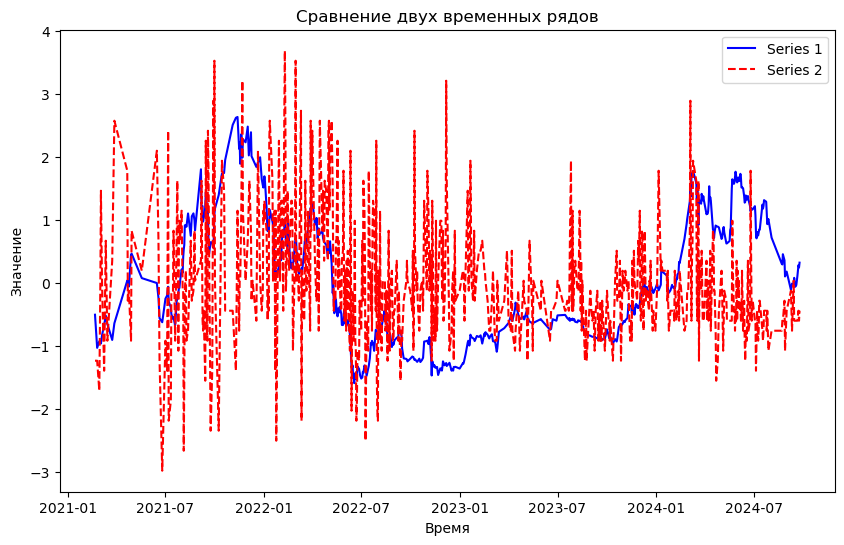

In [506]:
kolm_smirnov(doge_data_clean)

Статистика теста Колмогорова-Смирнова: 0.09951456310679611
p-value: 0.0005667484510726387
Распределения двух временных рядов статистически различны.


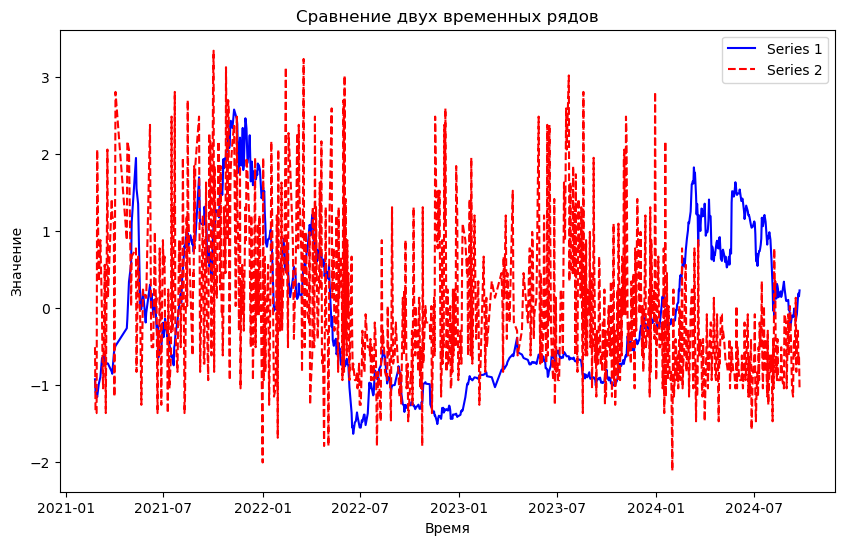

In [507]:
kolm_smirnov(ripp_data_clean)

Статистика теста Колмогорова-Смирнова: 0.1319052987598647
p-value: 3.826797574069579e-07
Распределения двух временных рядов статистически различны.


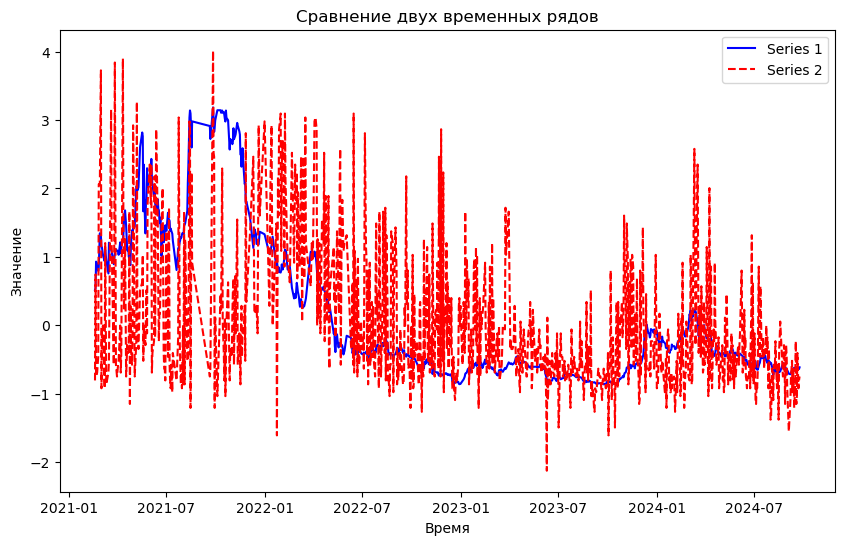

In [508]:
kolm_smirnov(card_data_clean)